## Start running flowacc / chi calc on all basin

In [9]:
import ee 
import shapely as shp
import pandas as pd
import numpy as np
import geopandas as gpd
import ast
from shapely.geometry import Polygon, MultiPolygon, Point
import rasterio
import geopandas as gpd
import sys
%load_ext autoreload
%autoreload 2
sys.path.insert(1, '/Users/gr_1/Documents/simplem/')
import simplem_par as simplem
import matplotlib.pyplot as plt
import multiprocess as mp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
eros1 = [None]*4631
eros2 = np.zeros(4631)
slpsall = np.zeros(4631)
slps2 = np.zeros(4631)
a = gpd.read_file('/Users/gr_1/Documents/cosmo_predict/octopus_v2/')

In [36]:
nr = 1000
Gs = np.zeros(nr)
ks = np.zeros(nr) + 1e-8#np.power(10.0,np.random.rand(nr)*-8+-5)
ns = np.random.rand(nr) * 4.0 #np.zeros(nr)+2.7#
ms = ns * .5#np.random.rand(nr)*.5+.1 #np.zeros(nr)+1.0
#concavity = np.random.rand(nr)*.6+.1
diffus =0*ks * np.power(10.0,np.random.rand(nr)*12+1)#np.zeros(nr)+1e-5#
#ms = ns * concavity
careas = np.power(10.0,np.random.rand(nr)*3)*0+12
#dn = np.random.rand(nr) + 1.0
dn = np.zeros(nr) + 1.0

In [46]:
dn

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
       2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ])

In [47]:
nr = 21
Gs = np.zeros(nr) #+ np.random.rand(nr)*15.0
ks = np.zeros(nr) + 0#np.power(10.0,np.random.rand(nr)*-8+-5)
ns = np.linspace(.2,4,20)#np.random.rand(nr) * 4.0 #np.zeros(nr)+2.7#
ms = ns * .4#np.random.rand(nr)*.5+.1 #np.zeros(nr)+1.0
#concavity = np.random.rand(nr)*.6+.1
diffus =np.zeros(nr)+.01#ks * np.power(10.0,np.random.rand(nr)*20)#np.zeros(nr)+1e-5#
#ms = ns * concavity
careas = np.power(10.0,np.random.rand(nr)*3)*0+12
dn = np.linspace(0,4,nr); #/ np.linspace(.1,4,nr)

In [5]:
nr = 1000
Gs = np.zeros(nr) #+ np.random.rand(nr)*15.0
ks = np.zeros(nr) + 1e-8# np.power(10.0,np.linspace(-10,-3,nr))
ns = np.zeros(nr) +4
ns = np.array(np.linspace(.2,4,nr)).ravel() #np.zeros(nr)+2.7#
ms = ns * .5#s for s in [.1, .2, .3, .35, .4, .45, .5, .55, .6, .7]]).ravel()  #np.zeros(nr)+1.0
concavity = np.zeros(nr)+.5#np.random.rand(nr)*.6+.1
diffus = 0*ks* np.power(10.0,np.random.rand(nr)*10-1)#np.zeros(nr)+1e-5#
#ms = ns * concavity
careas = np.zeros(nr)+12#np.zeros(nr)+12#np.power(10.0,np.random.rand(nr)*3)*5

In [29]:
nr = 6
Gs = np.zeros(nr) #+ np.random.rand(nr)*15.0
ks = np.zeros(nr) + 0*1e-8# np.power(10.0,np.linspace(-10,-3,nr))
ns = np.array(np.linspace(.2,4,nr)).ravel() #np.zeros(nr)+2.7#
ms = ns * .5#s for s in [.1, .2, .3, .35, .4, .45, .5, .55, .6, .7]]).ravel()  #np.zeros(nr)+1.0
concavity = np.zeros(nr)+.5#np.random.rand(nr)*.6+.1
diffus = np.zeros(nr)+.01#*ks* np.power(10.0,np.random.rand(nr)*10-1)#np.zeros(nr)+1e-5#
#ms = ns * concavity
careas = np.power(10.0,np.random.rand(nr)*3.69) 
dn = np.linspace(.333,2.0,6)

In [31]:
# Use f from n = 4 in standard run below


# f.sinkfill()
# f.slp_basin()
# f.stack()
# f.acc()

In [7]:
from matplotlib import cm
from matplotlib.colors import ListedColormap
jet = cm.get_cmap('jet', 64)
l = ListedColormap(jet(range(10,55)))

In [8]:
dem.bounds

NameError: name 'dem' is not defined

In [9]:
rivs = a['geometry'][0]
xs = []
ys=[]
for i in range(len(rivs.exterior.coords.xy[0])):
    xs.append(rivs.exterior.coords[i][0])
    ys.append(rivs.exterior.coords[i][1])
xbound = xs
ybound = ys

/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/764521966.py:67: SyntaxWarning: Short-form parameter (t) is not recommended. Use long-form parameter 'transparency' instead.
  fig.grdimage(


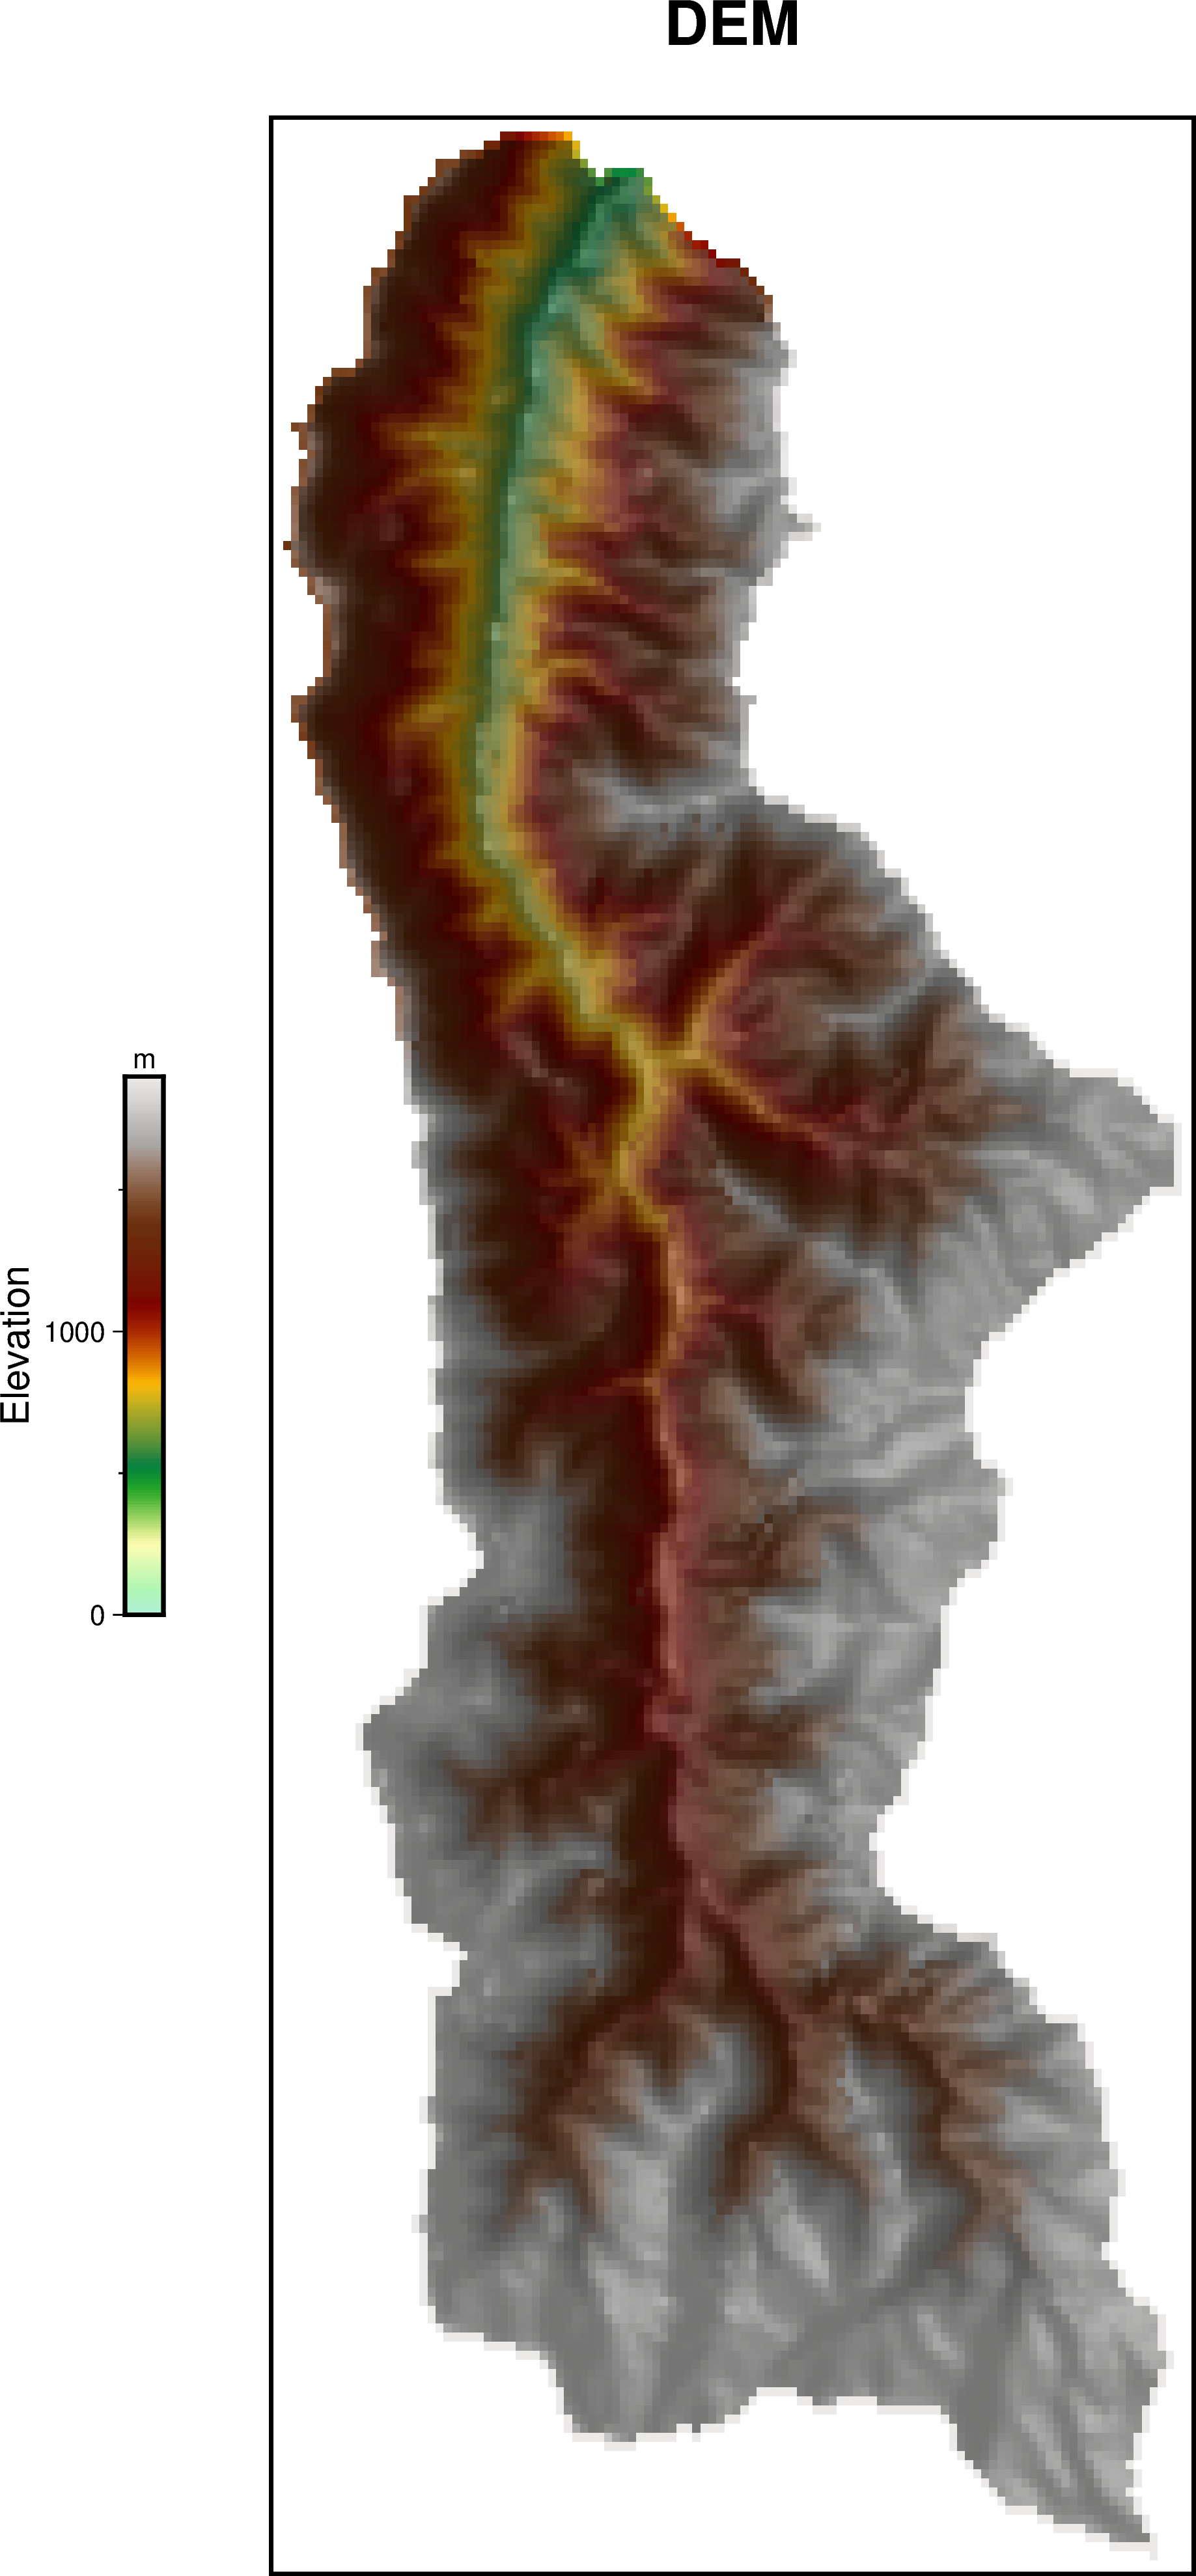

In [27]:
from skimage import filters
# T[T<=0] = .000000000000000000001
# plt.figure(figsize=(10,5))
# plt.imshow((T),vmin=0,vmax=(q),cmap=l)
# plt.xticks([])
# plt.yticks([])
# cbar = plt.colorbar(extend='max')
# cbar.ax.tick_params(labelsize=24)
# plt.savefig('../../tmpfig',dpi=300)


z = f.Z.copy()
z[f.Z == 0] = np.nan
geom = a[3:4]
import pygmt
import xarray as xr

ny,nx = np.shape(z)
lon = np.zeros(nx)
lat = np.zeros(ny)
for i in range(nx):
    lon[i], _ = dem.xy(0, i)
for i in range(ny):
    _, lat[i] = dem.xy(i, 0)
        

# Define region of interest around Yosemite valley
region = [dem.bounds[0], dem.bounds[2], dem.bounds[1], dem.bounds[3]]

fig = pygmt.Figure()

# Load sample grid (3 arc second global relief) in target area
da = xr.DataArray(z, coords=[('latitude', lat,
                                       {'units': 'degrees_north'}),
                                       ('longitude', lon,
                                       {'units': 'degrees_east'})], 
                         attrs = {'actual_range': [-1, 1]}
                 )

dataset = da.to_dataset(name='dataarray')


# calculate the reflection of a light source projecting from west to east
# (azimuth of 270 degrees) and at a latitude of 30 degrees from the horizon
dgrid = pygmt.grdgradient(grid=dataset.dataarray, radiance=[270, 30])

# define figure configuration
pygmt.config(FORMAT_GEO_MAP="ddd.x", MAP_FRAME_TYPE="plain")

# --------------- plotting the original Data Elevation Model -----------
pygmt.makecpt(cmap="dem4", series=[0, 1900, 10])
fig.grdimage(
    grid=pygmt.grdclip(dataset.dataarray,between=[3000,20000001,"NaN"]),
    projection="M12c",
    frame=['WSrt+t"DEM"', "xa0.5", "ya0.5"],
    nan_transparent=100,
    cmap=True,
)

fig.colorbar(position="JML+o1.4c/0c+w7c/0.5c", frame=["xa1000f500+lElevation", "y+lm"])

# --------------- plotting the hillshade map -----------

# Shift plot origin of the second map by 12.5 cm in x direction

#pygmt.makecpt(cmap="gray", series=[-1.5, 0.3, 0.01])
fig.grdimage(
    grid=dgrid,
    projection="M12c",
    cmap="gray",
    t=50,
    nan_transparent=100
)
fig.plot(data = geom, style="c0.02c",color='black')
fig.show()


####

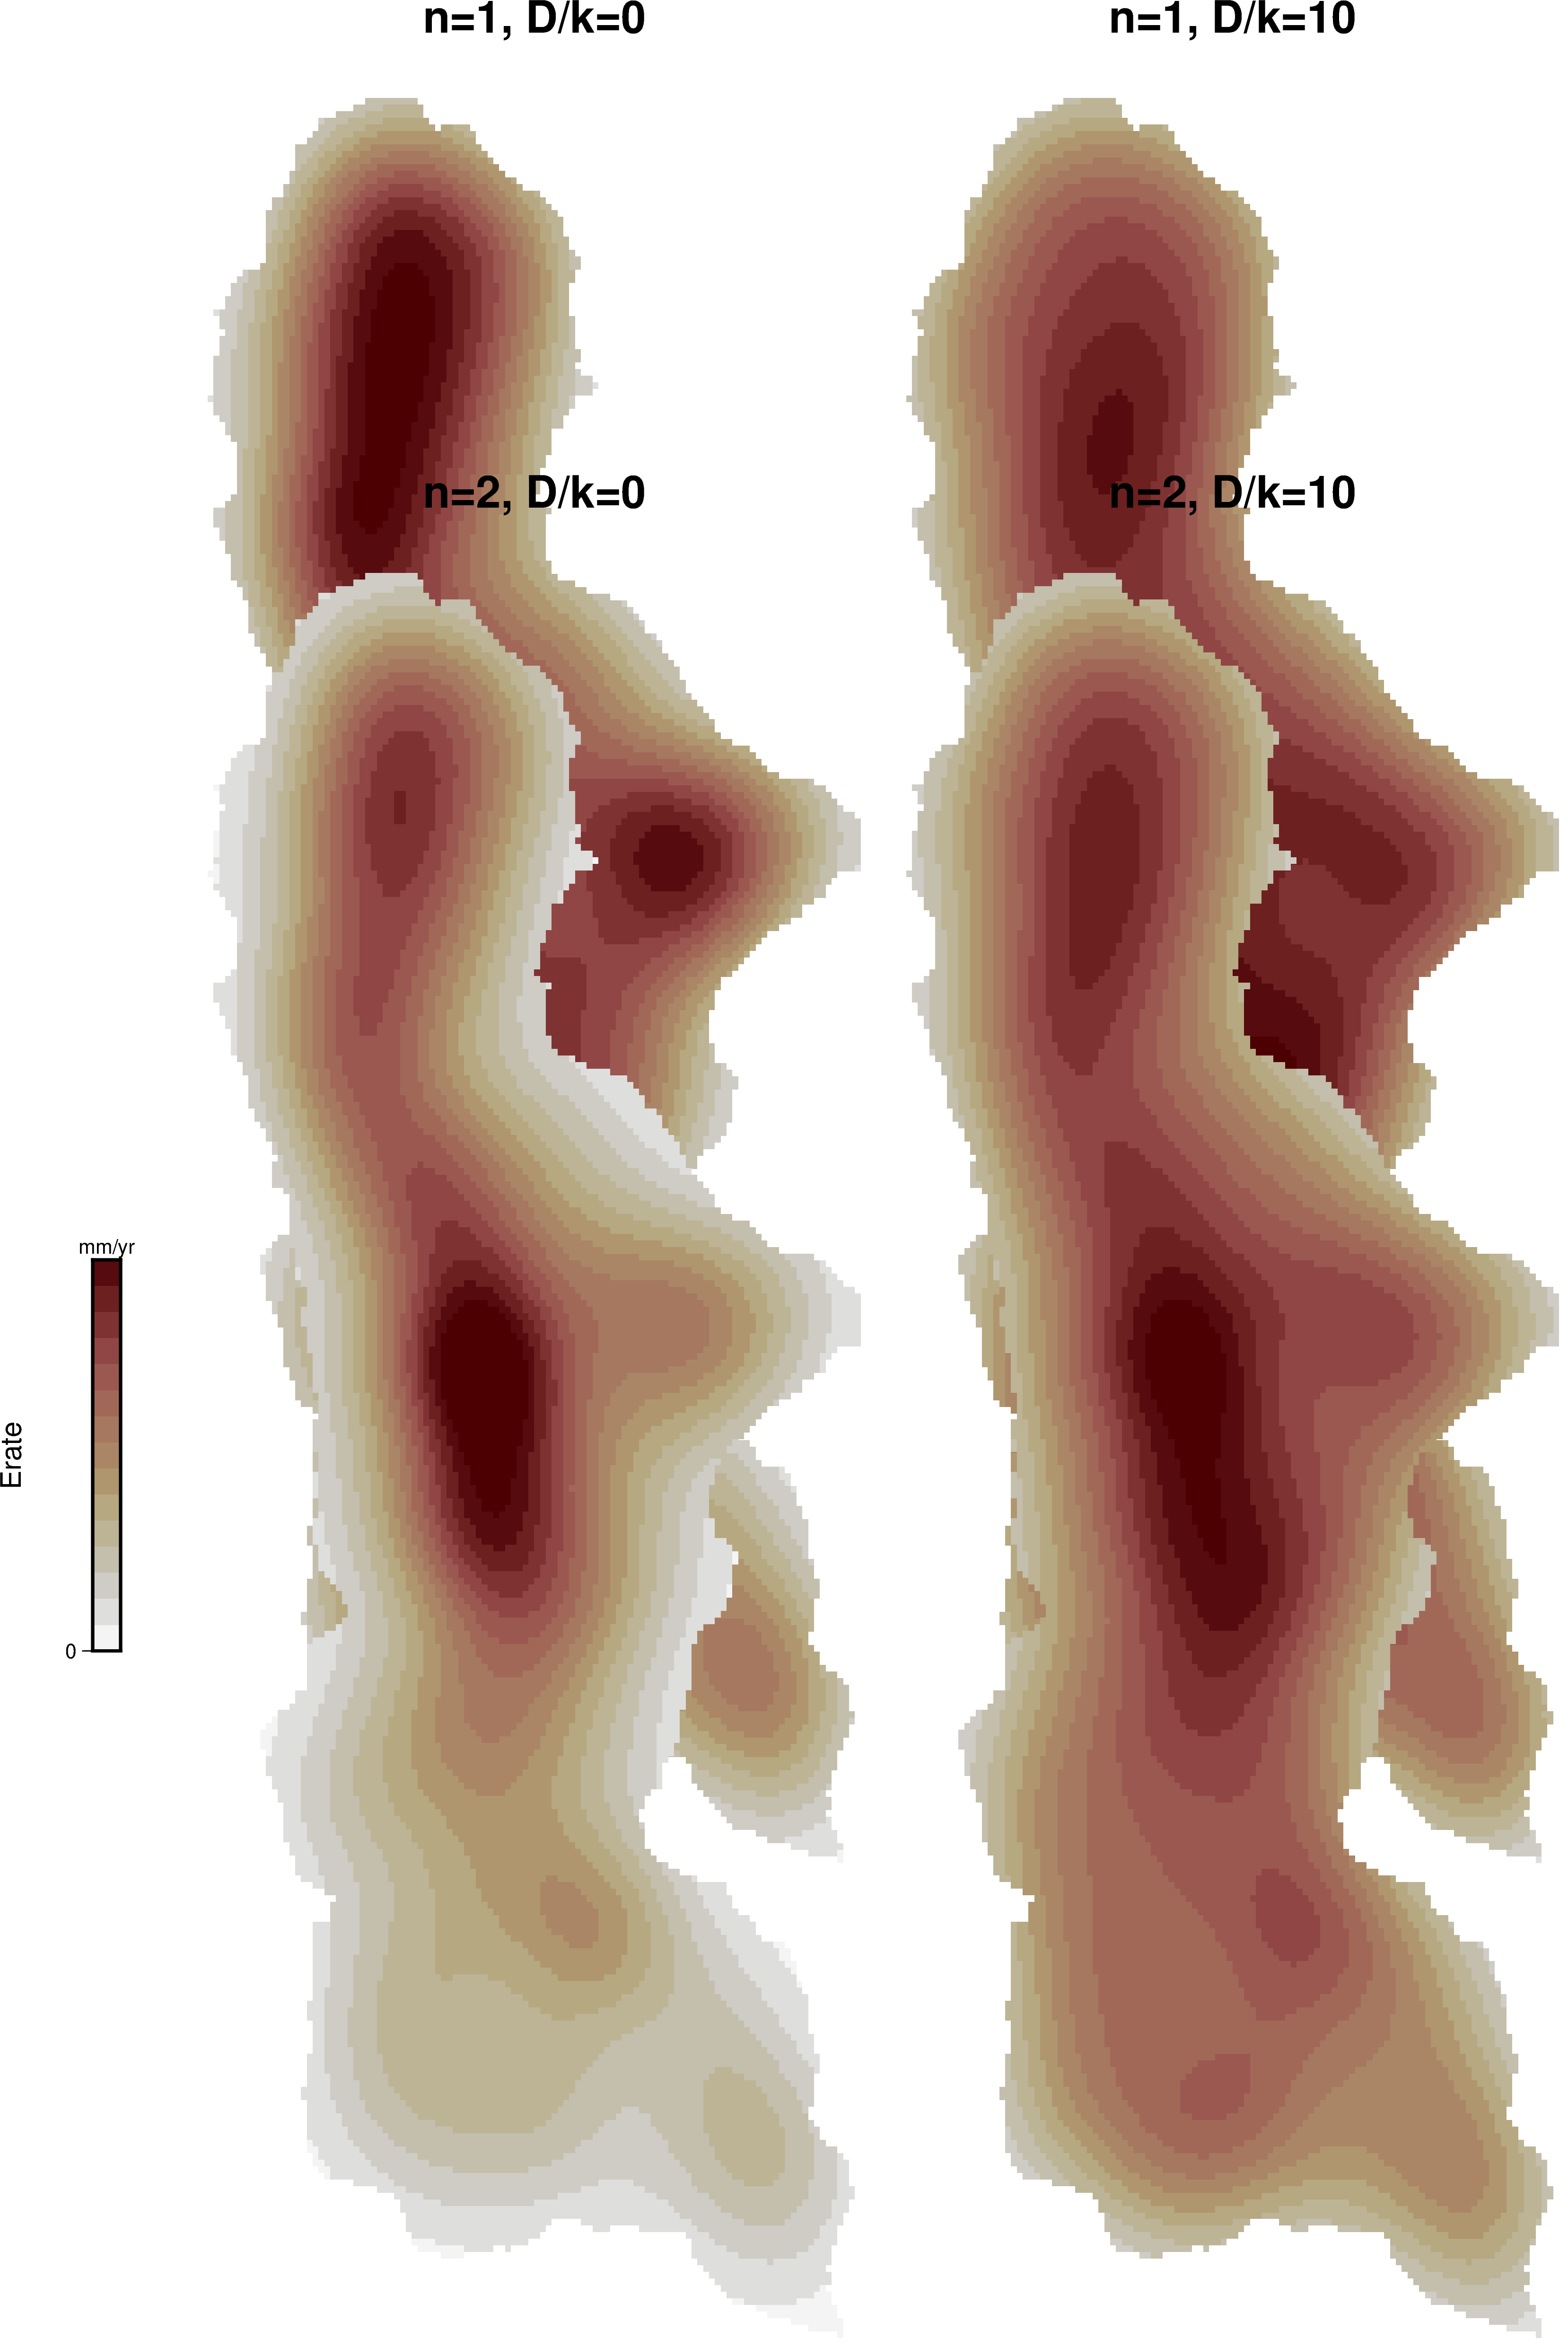

In [28]:

def gmteroplot(D,n):
    ny,nx = np.shape(z)

    F = simplem.erode_other_2(0, ny, nx ,f.I, f.s, 90.0, 90.0, n/2, n, np.zeros((ny,nx))+1e-8, f.slps,1000.00, f.A,np.zeros((ny,nx)), 12.0)
    Ed = simplem.diffuse(-D, f.Z, 90, 90,1000)
    Ed[Ed<0] = 0
    E = T = Ed+F
    L = F# np.divide(F,np.max(T.ravel()))
    R = Ed#np.divide(Ed,np.max(T.ravel()))
    T = L + R
    T*=1e4
    
    I = np.where(np.isnan(z))
    I[0][I[0]>ny-2] = ny-2
    I[1][I[1]>nx-2] = nx-2
    T[I[0]+1,I[1]+1]= 0 
    T[I[0]-1,I[1]-1] = 0
    T[I[0]-1,I[1]+1]= 0 
    T[I[0]+1,I[1]-1]= 0 
    T[I[0]+1,I[1]]= 0 
    T[I[0]-1,I[1]]= 0 
    T[I[0],I[1]+1]= 0 
    T[I[0],I[1]-1]= 0 

    T = filters.gaussian(T, sigma=(10,10), truncate=20, multichannel=True)
    T[np.isnan(z)] = np.nan

    q = np.quantile(T[T>0],.98)
    pygmt.makecpt(cmap="bilbao", series=[0, q, q/15], truncate="0/1")
    
    da = xr.DataArray(T, coords=[('latitude', lat,
                                       {'units': 'degrees_north'}),
                                       ('longitude', lon,
                                       {'units': 'degrees_east'})], 
                         attrs = {'actual_range': [-1, 1]}
                 )

    dataset = da.to_dataset(name='dataarray')
    if D>0:
        dk ="10"
    else:
        dk = "0"
    fig.grdimage(
        grid=dataset.dataarray,
        projection="M12c",
        frame=['+t"n={}, D/k={}"'.format(str(n),dk)],
        nan_transparent=100,
        )
    fig.plot(data = geom, style="c0.1c",color='black')
    return T
fig.shift_origin(xshift="8.5c")

fig = pygmt.Figure()
T = gmteroplot(0,1)
fig.shift_origin(xshift="12.5c")
T = gmteroplot(.1,1)
fig.shift_origin(yshift="-8.5c")
T = gmteroplot(.1,2)
fig.shift_origin(xshift="-12.5c")
T = gmteroplot(.0,2)
fig.colorbar(position="JML+o1.4c/0c+w7c/0.5c", frame=["xa100000000f500000+lErate", "y+lmm/yr"])
fig.show()




In [48]:
n=len(a)
def do_ero(i):
    k1[k1>0] = ks[i]
    E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr
    
    #plt.imshow(Zi)
    #plt.show()
    E[E<0] = 0
    E=E**dn[i]
    m = ms[i]
    n = ns[i]
    #E[A1<careas[i]] = 0
    ero = simplem.erode_other_2(Gs[i],ny1,nx1,I1,s1,dx1,dy1,ms[i],ns[i],k1,slps1,dt1,A1,E,careas[i])
    A = simplem.acc(ero.copy(), ny1, nx1, I1, s1)
   # print(np.sort(A1.ravel()))
    pl =(A.ravel()[np.argmax(A1.ravel())])/np.max(A1.ravel())
    return pl, i
nfail = 0
for c in range(0,n,1):
    try:
        print(c)

        dem = rasterio.open('/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_{}.tif'.format(str(c)))
        lat = dem.xy(0,0)[1]
        dx = np.cos(lat/180*np.pi) * (1852/60) * 3
        f = simplem.fs()
        f.dx = dx
        f.dy = 92.59

        f.set_z(np.pad(np.float64(np.squeeze(dem.read())), pad_width=2))

        f.BC = np.where(f.Z.transpose().ravel()<=0)[0]

        f.slp_basin()
        slpx= f.slps.copy()

        f.k[:,:] = 1e-6
        f.k[f.Z == 0] = 0

        f.sinkfill()
        f.slp_basin()

        #f.slp_mn()
        slps = f.slps.copy()

        f.dt = 1000
        f.stack()
        f.acc()
        Zi = f.Z.copy()
        A1=f.A.copy()

        ero = f.erode_other()
        #f.slp_mn()

       # slps[slps>1]= 0
        #f.slp()
        mnmat = np.zeros((len(ms),1))
        if 1:
            k1 = f.k.copy()

            A1 = f.A.copy()
            ny1 = f.ny
            nx1 = f.nx
            I1 = f.I.copy()
            slps1 = f.slps.copy()
            s1 = f.s
            dt1 = f.dt
            dy1 =f.dy
            dx1 = f.dx
            with mp.Pool(6) as p:
                vals = p.map(do_ero,[i for i in range(len(ns))])

        eros1[c] = mnmat[ list(zip(*vals))[1],0] =  list(zip(*vals))[0]
        #fig,ax = plt.subplots(figsize=(5,5))
        #plt.imshow(vals[0][2])
        #eros1[c] = (f.A.ravel()[f.Z.ravel()>0][np.argmax(A.ravel()[f.Z.ravel() > 0])])/np.max(A.ravel()[f.Z.ravel()>0])
        #A2 = simplem.acc(slpx, ny1,nx1,I1,s1)
        #slpsall[c] = (A2.ravel()[np.argmax(A1.ravel())])/np.max(A1.ravel())

        #slps1[c] = np.mean(np.logical_and(slps[f.Z>0]))

      #  f.slp_mn()

       # slps = f.slps.copy()
      #  f.slp()
       # slps[slps>1] = 0
        f.acc(slps)
        slps2[c] = (f.A.ravel()[f.Z.ravel()>0][np.argmax(A1.ravel()[f.Z.ravel() > 0])])/np.max(A1.ravel()[f.Z.ravel()>0])

       # print(np.mean(f.slps.ravel()[A.ravel()>1]))
       # print(f.A.ravel()[np.argmax(A.ravel())]/np.max(A.ravel()))
        #print(np.sum(slps.ravel()[np.logical_and(f.Z.ravel()>1,f.slps.ravel()<1)]))
       # print(max(f.A.ravel()))#[np.argmax(A.ravel())])
    
    except Exception as e:
        print('fail' + str(c))
        print(e)
       # po=1
       # nfail+=1
                      

0
fail0
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_0.tif: No such file or directory
1
fail1
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_1.tif: No such file or directory
2
fail2
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_2.tif: No such file or directory
3
fail3
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_3.tif: No such file or directory
4
fail4
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_4.tif: No such file or directory
5
fail5
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_5.tif: No such file or directory
6
fail6
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_6.tif: No such file or directory
7
fail7
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_7.tif: No such file or directory
8
fail8
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_8.tif: No such file or directory
9
fail9
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_

/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


13
13
13


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


14
17147068
16562088


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


15
43843125
42171667


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


16
fail16
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_16.tif: No such file or directory
17
fail17
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_17.tif: No such file or directory
18
fail18
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_18.tif: No such file or directory
19
fail19
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_19.tif: No such file or directory
20
31829078
30408934


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


21
10309354
9425483


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


22
10309354
9425477


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


23
10309354
9425474


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


24
fail24
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_24.tif: No such file or directory
25
30394404
28987571


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


26
8879776
8017053


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


27
fail27
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_27.tif: No such file or directory
28
fail28
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_28.tif: No such file or directory
29
fail29
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_29.tif: No such file or directory
30
16178085
15993212


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


31
fail31
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_31.tif: No such file or directory
32
5919238
5787994


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


33
38867516
38770528


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


34
6554025
5982847


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


35
36726906
36630370


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


36
10326314
10065305


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


37
32413012
32317428


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


38
18785937
18694218


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


39
38
35


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


40
7642932
7279201


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


41
38
35


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


42
12798599
12404684


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


43
12798599
12404681


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


44
5948269
5501053


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


45
38
35


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


46
10052799
9585340


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


47
38
35


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


48
13230595
12512656


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


49
8024259
7733814


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


50
4659314
4273281


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


51
4659314
4273281


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


52
10143318
10070103


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


53
9250278
9138939


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


54
5934356
5806231


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


55
10057146
9782633


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


56
6491908
5954798


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


57
4758220
4705945


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


58
3873728
3658380


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


59
4878328
4681985


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


60
7573329
7472074


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


61
4381562
4193803


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


62
14667987
14034595


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


63
6911970
6911970


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


fail63
attempt to get argmax of an empty sequence
64
9652012
9418351


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


65
9652012
9418353


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


66
8977519
8752783


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


67
11017750
10860342


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


68
3259908
3024495


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


69
3259908
3024498


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


70
5986237
5863847


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


71
7940908
7874876


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


72
7089164
6866581


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


73
10852008
10799253


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


74
10852008
10799267


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


75
9640001
9231509


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


76
5236180
5069426


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


77
6927639
6777825


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


78
6927639
6777828


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


79
6927639
6777828


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


80
7081958
7021201


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


81
3730324
3684104


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


82
3730324
3684096


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


83
6213133
6017439


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


84
3631494
3518970


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


85
3784677
3739088


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


86
3785333
3739747


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


87
3572172
3507083


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


88
11498023
11373096


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


89
5315193
5249885


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


90
6034955
5685420


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


91
5980093
5634864


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


92
4662446
4407263


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


93
7028609
6924992


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


94
4233882
4109557


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


95
3280365
3014209


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


96
3280365
3014204


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


97
4327597
4013053


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


98
1949596
1697163


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


99
3751555
3676973


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


100
3268393
3176032


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


101
5481611
5379375


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


102
4532766
4431102


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


103
4594637
4493433


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


104
4594661
4493449


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


105
2966478
2843935


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


106
2452115
2367674


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


107
2601361
2347581


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


108
3306621
3206743


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


109
3493827
3409012


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


110
4124405
4074781


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


111
2317398
2153043


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


112
5223036
5116793


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


113
3481530
3258798


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


114
5576365
5249469


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


115
5513782
5187107


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


116
1880711
1719406


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


117
3835185
3798300


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


118
3835185
3798298


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


119
4632942
4316573


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


120
20
20


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


121
3074789
3013733


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


122
1713368
1695999


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


123
1713373
1696006


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


124
1712758
1695409


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


125
1712758
1695409


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


126
2381019
2299323


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


127
2381019
2299324


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


128
2381019
2299325


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


129
2886112
2661866


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


130
3415917
3324259


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


131
3415917
3324259


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


132
2233285
2214994


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


133
2233403
2215115


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


134
4148270
4062489


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


135
2209600
2129967


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


136
2209600
2129969


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


137
1829460
1766437


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


138
2790261
2757601


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


139
1365833
1349849


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


140
1365833
1349843


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


141
1343919
1328029


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


142
1342295
1326405


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


143
1342295
1326408


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


144
3918955
3623320


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


145
2708708
2667838


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


146
6134650
5953024


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


147
6134650
5953020


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


148
2937006
2858209


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


149
2937006
2858208


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


150
4051444
3878744


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


151
5392840
5130925


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


152
1207619
1192329


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


153
1220243
1205139


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


154
1785140
1714009


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


155
2458332
2386432


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


156
2699242
2668154


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


157
5541813
5488460


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


158
2421833
2391300


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


159
2672663
2525448


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


160
1865652
1827725


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


161
2892985
2750676


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


162
2826710
2556379


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


163
1993758
1959413


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


164
2026792
1915503


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


165
3317296
3290141


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


166
2413523
2382408


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


167
5620814
5601057


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


168
5620814
5601048


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


169
1647956
1621188


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


170
5082455
4999480


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


171
2377908
2235939


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


172
1620175
1484355


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


173
1846856
1830469


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


174
1682663
1576840


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


175
1711557
1609317


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


176
4366300
4241904


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


177
2268242
2242520


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


178
5156216
5009670


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


179
5156216
5009673


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


180
3969507
3850124


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


181
1766423
1722953


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


182
1705012
1682646


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


183
3289952
3221337


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


184
3082899
3057378


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


185
1807146
1711814


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


186
3108637
3004497


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


187
1371159
1343582


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


188
4259470
4175954


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


189
1679463
1644835


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


190
2765168
2666473


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


191
2479433
2451269


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


192
2299108
2299108


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


fail192
attempt to get argmax of an empty sequence
193
1576565
1565129


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


194
1476312
1464931


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


195
4744878
4675558


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


196
4749036
4680017


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


197
2657367
2617104


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


198
1217804
1202991


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


199
3332391
3321824


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


200
1673537
1651111


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


201
826742
780754


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


202
1238950
1224051


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


203
975584
975584


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


fail203
attempt to get argmax of an empty sequence
204
1933279
1848272


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


205
4323844
4191965


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


206
1009567
998792


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


207
1244376
1121231


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


208
2849536
2748865


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


209
2502900
2472723


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


210
1518889
1475586


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


211
1580018
1563806


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


212
1526493
1483451


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


213
1294485
1271672


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


214
17
17


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


215
2113501
2088759


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


216
954259
929119


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


217
1113628
1099332


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


218
794743
787146


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


219
304167
296883


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


220
458629
456091


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


221
315021
312889


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


222
358584
358584


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


fail222
attempt to get argmax of an empty sequence
223
237993
235588


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


224
392698
390306


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


225
4144031
4086410


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


226
1801136
1777179


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


227
4149607
4092411


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


228
2337619
2317871


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


229
1264240
1170891


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


230
1774818
1753611


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


231
1854584
1802458


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


232
1827421
1630767


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


233
698065
667056


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


234
751377
744440


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


235
824274
820873


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


236
925769
925769


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


fail236
attempt to get argmax of an empty sequence
237
857631
824175


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


238
1113295
1095500


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


239
643402
604815


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


240
1535632
1524217


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


241
729026
718194


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


242
671232
671232


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


fail242
attempt to get argmax of an empty sequence
243
542525
492564


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


244
1830443
1819738


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


245
951896
946685


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


246
912846
888216


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


247
642390
642390


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


fail247
attempt to get argmax of an empty sequence
248
689381
668166


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


249
1673430
1605629


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


250
2074919
2055832


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


251
1265519
1250943


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


252
1896313
1873995


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


253
1109591
1099719


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


254
3716189
3698582


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


255
3716189
3698575


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


256
1398761
1376643


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


257
1146655
1137099


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


258
1350326
1316514


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


259
1222083
1186883


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


260
1296232
1249701


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


261
2385789
2284634


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


262
867985
859697


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


263
1592845
1554531


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


264
1074038
1026119


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


265
1826885
1794539


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


266
981640
959935


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


267
1807120
1790455


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


268
2111214
2092555


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


269
1052138
1041720


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


270
770888
740049


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


271
1494930
1482835


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


272
2554850
2448930


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


273
1073406
998149


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


274
735243
703281


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


275
693761
687133


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


276
900243
856976


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


277
690017
626807


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


278
953940
953940


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


fail278
attempt to get argmax of an empty sequence
279
692189
687760


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


280
691833
670554


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


281
691833
670551


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


282
940409
908719


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


283
940409
908715


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


284
517797
511317


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


285
808568
784935


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


286
539543
513840


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


287
941265
910498


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


288
704561
700523


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


289
518403
515348


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


290
718019
687933


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


291
793061
721378


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


292
772287
767704


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


293
868441
863418


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


294
2505899
2487187


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


295
2505899
2487189


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


296
1193604
1176440


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


297
1119937
1098351


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


298
504818
494400


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


299
312337
309075


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


300
460008
448445


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


301
615946
584229


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


302
541745
538015


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


303
752343
748589


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


304
577611
573961


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


305
460691
457317


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


306
463294
459953


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


307
461484
458126


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


308
809835
803538


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


309
462212
458870


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


310
462338
459000


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


311
741853
735660


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


312
610125
598470


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


313
548143
543769


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


314
557649
553836


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


315
641662
634727


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


316
1048450
1037593


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


317
196687
190585


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


318
255396
253309


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


319
186797
180779


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


320
208736
187818


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


321
360796
358345


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


322
219262
210219


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


323
376554
374021


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


324
206080
204329


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


325
214267
212830


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


326
256421
255154


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


327
286768
285179


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


328
99932
99303


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


329
260716
258505


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


330
332592
327859


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


331
143362
142388


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


332
67346
66392


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


333
1094241
1086286


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


334
1042359
970396


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


335
1146873
1132736


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


336
919174
913959


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


337
1221301
1175809


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


338
1089840
1082028


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


339
1088623
1039184


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


340
541610
534236


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


341
851640
806342


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


342
328840
323199


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


343
328840
323199


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


344
218083
214580


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


345
343814
339974


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


346
274053
237640


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


347
238462
234739


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


348
269278
258837


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


349
269278
258835


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


350
153601
152156


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


351
183136
181294


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


352
172794
169714


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


353
456070
456070


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


fail353
attempt to get argmax of an empty sequence
354
174062
164124


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


355
154013
152975


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


356
278196
276121


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


357
318984
316469


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


358
326630
311750


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


359
238753
226807


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


360
167079
164998


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


361
167079
164998


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


362
237234
233468


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


363
201747
199758


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


364
203446
201381


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


365
325629
324087


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


366
1184048
1143362


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


367
1361340
1355038


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


368
809786
744846


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


369
845813
842763


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


370
849118
846072


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


371
849118
846072


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


372
140093
131691


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


373
264728
262347


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


374
137291
132279


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


375
284286
279041


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


376
423694
417435


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


377
543542
541583


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


378
194284
192783


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


379
343131
341754


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


380
178593
171969


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


381
152723
151772


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


382
146870
143168


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


383
117931
116990


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


384
136641
134387


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


385
107881
106366


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


386
180117
178209


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


387
86541
85845


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


388
55030
54407


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


389
125726
123807


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


390
339120
338116


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


391
658727
654376


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


392
804905
796774


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


393
804905
796771


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


394
890720
870689


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


395
1446546
1432832


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


396
713777
692294


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


397
1054637
1013170


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


398
1334257
1317131


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


399
1081462
1074786


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


400
1135340
1118401


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


401
780857
773003


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


402
704219
606146


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


403
572451
569911


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


404
573484
570946


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


405
573484
570947


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


406
700846
693070


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


407
1700061
1690370


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


408
1702204
1692531


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


409
1086297
1052282


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


410
2397154
2335828


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


411
875038
800245


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


412
2230121
2221453


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


413
2408002
2357399


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


414
1719932
1690595


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


415
2600458
2589353


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


416
903298
868879


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


417
880840
810585


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


418
922604
919047


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


419
1139692
1126770


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


420
791671
787684


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


421
539604
524536


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


422
480871
475178


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


423
671232
671232


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


fail423
attempt to get argmax of an empty sequence
424
728869
685423


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


425
894677
856513


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


426
17
17


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


427
584044
579700


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


428
599224
595340


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


429
599224
595340


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


430
454962
440590


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


431
387684
382099


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


432
387684
382098


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


433
520604
513735


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


434
609535
606632


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


435
609634
606741


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


436
399242
391420


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


437
587880
587880


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


fail437
attempt to get argmax of an empty sequence
438
580673
572342


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


439
553297
549773


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


440
791318
732482


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


441
425182
422260


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


442
338143
319142


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


443
423669
420051


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


444
248339
246510


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


445
175190
173696


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


446
255825
254232


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


447
346498
339372


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


448
143966
141844


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


449
193587
187418


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


450
164641
153899


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


451
149028
144528


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


452
196195
193859


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


453
230183
229230


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


454
115911
113773


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


455
87662
86119


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


456
130692
129608


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


457
205985
204997


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


458
193588
184395


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


459
154779
152996


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


460
809863
775517


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


461
314633
291268


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


462
441430
414847


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


463
153015
151235


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


464
1113357
1100924


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


465
900545
884321


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


466
658411
632857


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


467
757575
753930


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


468
759079
755453


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


469
fail469
Failed in nopython mode pipeline (step: nopython frontend)
- Resolution failure for literal arguments:
Failed in nopython mode pipeline (step: nopython frontend)
Internal error at <numba.core.typeinfer.ExhaustIterConstraint object at 0x174f205b0>.
wrong tuple length for '$8call_method.3': expected 2, got 0
During: typing of exhaust iter at /Users/gr_1/Documents/simplem/simplem_par.py (257)
Enable logging at debug level for details.

File "../simplem/simplem_par.py", line 257:
    def set_z(self, Z):
        self.ny, self.nx = numpy.shape(Z)
        ^

- Resolution failure for non-literal arguments:
None

During: resolving callee type: BoundFunction((<class 'numba.core.types.misc.ClassInstanceType'>, 'set_z') for instance.jitclass.fs#1711b12b0<m:float64,dx:float64,dy:float64,t:float64,dt:float64,nx:int64,ny:int64,A:array(float64, 2d, A),Z:array(float64, 2d, A),k:array(float64, 2d, A),n:float64,s:array(int64, 2d, A),I:array(int64, 1d, A),U:float64,chi:array(float64, 2d, A),BC

/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


471
698047
683427


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


472
502979
499494


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


473
536121
536121


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


fail473
attempt to get argmax of an empty sequence
474
613864
610360


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


475
514166
493749


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


476
586298
581964


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


477
634259
632061


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


478
254887
246290


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


479
654789
651519


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


480
468615
466032


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


481
513117
513117


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


fail481
attempt to get argmax of an empty sequence
482
501615
501615


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


fail482
attempt to get argmax of an empty sequence
483
379775
366859


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


484
371486
368730


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


485
560472
547559


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


486
443756
429310


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


487
699550
681784


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


488
259513
255018


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


489
425387
404268


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


490
575229
572790


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


491
417476
414079


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


492
1203798
1196828


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


493
357556
354792


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


494
508769
490578


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


495
702137
697663


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


496
738089
733421


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


497
604943
602088


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


498
611454
604078


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


499
749691
746487


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


500
560509
557704


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


501
551204
516462


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


502
707267
703453


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


503
830059
810820


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


504
620799
612831


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


505
386631
386631


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


fail505
attempt to get argmax of an empty sequence
506
459151
451167


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


507
253020
243320


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


508
467710
464994


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


509
366291
362315


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


510
957424
936585


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


511
213342
210673


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


512
695377
675183


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


513
363303
362411


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


514
363303
362411


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


515
372072
371198


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


516
459436
446176


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


517
562940
558483


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


518
580180
576719


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


519
642440
640516


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


520
706463
703039


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


521
308429
307070


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


522
308429
307071


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


523
627203
621470


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


524
394448
389886


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


525
396042
393636


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


526
538905
537687


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


527
538905
537687


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


528
536514
535300


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


529
393379
390998


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


530
788558
782918


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


531
310416
307201


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


532
185418
182745


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


533
794317
789117


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


534
794317
789116


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


535
411618
401517


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


536
447447
443991


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


537
322447
311026


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


538
393910
388401


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


539
366765
364490


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


540
362956
356733


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


541
374622
373244


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


542
248404
245892


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


543
453652
432994


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


544
267839
263819


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


545
363536
358670


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


546
271038
259808


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


547
244672
229673


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


548
404939
403187


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


549
336782
330889


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


550
193791
164881


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


551
185224
183365


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


552
391074
386981


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


553
395998
381581


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


554
478930
474528


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


555
320996
305437


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


556
467324
465258


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


557
196602
183976


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


558
360839
358576


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


559
352331
347137


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


560
352331
347138


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


561
178916
175516


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


562
153015
151235


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


563
503167
501674


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


564
159038
153421


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


565
89266
88256


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


566
54332
53146


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


567
119725
117056


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


568
163293
161760


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


569
159709
158177


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


570
122462
120727


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


571
138733
137145


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


572
153596
151825


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


573
1159
1153


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


574
178916
175516


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


575
100586
99428


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


576
181332
179142


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


577
160422
156838


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


578
160422
156840


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


579
229597
227458


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


580
119670
118794


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


581
206510
205897


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


582
81517
80763


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


583
108956
104827


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


584
89504
87768


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


585
90361
89155


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


586
81813
80885


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


587
128921
125864


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


588
58073
56023


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


589
96416
95657


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


590
100860
100084


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


591
129492
128228


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


592
178916
175516


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


593
297017
289142


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


594
241569
241569


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


fail594
attempt to get argmax of an empty sequence
595
241410
239052


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


596
179706
176403


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


597
219832
199547


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


598
314493
288433


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


599
168225
165985


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


600
1322735
1311947


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


601
364880
356299


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


602
364880
356300


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


603
288793
286512


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


604
233870
229953


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


605
403036
381286


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


606
310586
309275


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


607
257120
245803


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


608
188430
186481


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


609
280531
274714


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


610
387591
382150


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


611
273411
269425


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


612
229003
227457


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


613
303139
296701


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


614
223486
222009


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


615
238462
234739


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


616
238462
234737


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


617
287077
286054


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


618
275669
274262


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


619
266350
264949


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


620
261872
260471


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


621
261872
260472


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


622
342218
340245


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


623
259922
258528


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


624
272299
270886


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


625
272299
270885


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


626
252692
251297


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


627
252717
251324


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


628
250752
249361


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


629
327961
326707


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


630
322054
317898


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


631
211838
209420


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


632
370549
368899


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


633
259419
256514


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


634
261013
259791


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


635
93614
89497


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


636
168662
167524


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


637
121371
118859


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


638
227716
224321


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


639
282176
268505


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


640
183469
179663


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


641
284301
282060


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


642
125404
123833


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


643
123086
122089


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


644
125325
124248


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


645
151714
146631


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


646
170596
168503


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


647
170596
168504


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


648
88867
88202


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


649
169519
164608


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


650
94718
93614


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


651
86330
83684


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


652
86330
83684


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


653
86330
83684


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


654
170464
167231


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


655
208849
200017


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


656
227795
217331


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


657
161697
159612


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


658
160705
158628


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


659
135022
133603


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


660
193773
188852


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


661
166982
165448


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


662
83842
82299


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


663
126826
124831


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


664
56645
53525


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


665
142567
141838


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


666
202148
200606


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


667
168824
167295


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


668
194523
192015


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


669
299949
288372


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


670
196257
193708


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


671
514906
504738


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


672
279808
269458


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


673
168289
165192


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


674
229599
222469


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


675
1084205
1081601


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


676
180652
179763


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


677
288959
287770


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


678
161915
160813


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


679
209422
207693


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


680
156184
154616


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


681
154564
147168


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


682
307380
306297


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


683
307380
306296


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


684
208500
207573


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


685
148654
138938


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


686
308040
306961


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


687
181726
180592


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


688
152377
150886


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


689
123627
119228


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


690
166242
165305


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


691
176393
170551


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


692
129092
126542


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


693
131860
130440


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


694
302417
300364


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


695
128489
127312


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


696
199687
198835


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


697
124288
122905


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


698
176734
175213


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


699
167163
161724


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


700
138939
138257


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


701
175805
175340


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


702
228463
226203


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


703
163613
160805


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


704
154734
153007


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


705
114831
113245


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


706
108625
102801


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


707
277338
275737


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


708
127459
125547


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


709
220498
214780


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


710
239049
237674


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


711
134337
130454


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


712
194739
193382


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


713
203510
199255


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


714
100874
100247


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


715
100874
100247


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


716
160795
157381


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


717
190814
178135


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


718
87231
84658


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


719
74078
71485


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


720
102201
101583


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


721
155991
149014


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


722
198322
196460


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


723
271448
270559


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


724
109646
103955


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


725
92501
87112


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


726
259379
258954


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


727
101990
101072


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


728
57127
55361


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


729
170551
169697


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


730
206165
204297


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


731
170964
168941


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


732
523528
519779


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


733
97495
97106


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


734
74661
73869


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


735
75897
75501


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


736
75897
75501


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


737
75897
75501


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


738
350
345


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


739
139650
139650


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


fail739
attempt to get argmax of an empty sequence
740
174239
172414


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


741
102275
100541


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


742
94075
93170


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


743
215930
211544


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


744
109966
109170


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


745
109966
109170


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


746
85415
81772


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


747
76574
75999


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


748
133927
132247


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


749
108764
108157


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


750
100357
97131


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


751
160730
159809


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


752
187120
186663


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


753
167553
165589


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


754
113480
112748


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


755
61660
59305


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


756
78551
68661


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


757
127022
125624


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


758
87844
86036


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


759
213283
212226


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


760
105306
104341


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


761
56351
55209


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


762
344005
343030


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


763
96315
93784


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


764
149250
148692


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


765
282984
282372


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


766
83122
79375


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


767
161744
155448


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


768
90510
83433


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


769
64714
61320


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


770
162157
161711


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


771
162930
161498


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


772
93504
92766


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


773
229136
225430


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


774
93623
88926


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


775
100013
99382


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


776
212201
211107


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


777
60200
59444


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


778
109415
104886


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


779
123987
123465


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


780
128381
126436


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


781
103725
102445


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


782
103725
102445


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


783
103725
102446


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


784
74282
69659


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


785
98045
96770


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


786
74624
70013


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


787
96131
94601


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


788
83458
83115


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


789
103904
102444


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


790
72627
72049


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


791
81673
80543


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


792
55660
55042


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


793
78083
77705


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


794
112035
111373


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


795
50975
50672


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


796
1472
1463


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


797
137140
134498


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


798
82443
75179


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


799
82265
74926


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


800
1159
1153


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


801
137140
134497


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


802
58121
57879


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


803
1472
1463


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


804
137140
134497


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


805
2190
2154


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


806
137140
134498


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


807
2719
2714


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


808
137140
134497


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


809
93984
93219


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


810
111626
107635


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


811
160816
158837


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


812
91323
90592


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


813
110548
109988


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


814
114444
106651


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


815
76512
74055


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


816
140205
138672


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


817
114817
108156


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


818
51370
50643


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


819
62058
61396


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


820
62058
61398


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


821
62058
61396


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


822
62058
61396


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


823
62058
61396


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


824
62058
61396


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


825
62058
61397


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


826
154818
151116


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


827
77852
76903


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


828
77852
76902


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


829
63691
60643


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


830
130202
129556


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


831
167540
167100


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


832
167540
167102


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


833
148090
146825


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


834
54289
53989


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


835
113549
112792


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


836
120707
119785


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


837
96303
94089


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


838
6796
6756


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


839
57237
55512


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


840
39578
37920


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


841
46955
46370


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


842
44180
43180


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


843
124621
124004


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


844
46715
44830


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


845
53652
51951


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


846
107874
107576


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


847
121768
120435


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


848
76226
75626


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


849
62846
61065


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


850
44094
43774


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


851
81131
80813


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


852
37340
37049


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


853
108933
105105


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


854
93498
93030


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


855
71906
69459


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


856
64433
62629


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


857
99635
99265


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


858
72641
68118


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


859
722
720


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


860
57426
57090


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


861
99066
98649


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


862
50772
46118


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


863
93145
92518


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


864
108954
106431


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


865
96628
93695


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


866
73104
72535


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


867
94753
94360


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


868
47746
47231


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


869
58094
54082


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


870
371354
369597


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


871
62370
61797


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


872
66147
65220


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


873
116323
114675


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


874
69881
67288


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


875
61988
56478


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


876
58548
58202


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


877
58548
58202


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


878
58548
58202


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


879
69798
67964


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


880
76441
72011


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


881
11354
11308


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


882
76171
72807


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


883
83043
81963


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


884
9179
9096


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


885
65675
64175


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


886
142901
142230


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


887
142901
142230


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


888
41817
41545


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


889
80720
79283


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


890
69231
66825


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


891
65375
63828


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


892
192
191


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


893
60473
58806


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


894
71238
70568


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


895
67251
63313


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


896
50730
49839


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


897
101215
97986


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


898
53424
51348


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


899
44523
43981


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


900
53424
51348


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


901
116055
115395


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


902
44530
44175


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


903
63436
61669


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


904
48220
46909


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


905
66764
65100


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


906
44094
43774


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


907
57457
56789


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


908
55679
55188


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


909
55679
55188


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


910
51053
49761


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


911
56126
55638


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


912
111622
111110


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


913
75553
74158


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


914
73800
73301


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


915
144994
144188


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


916
277035
276137


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


917
8489
8445


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


918
74868
74352


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


919
91588
90958


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


920
55932
55188


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


921
55932
55188


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


922
100402
99997


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


923
85772
81118


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


924
53540
52755


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


925
86232
85764


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


926
81708
80874


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


927
59750
54747


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


928
2301
2288


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


929
59675
59367


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


930
1906
1889


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


931
36242
35778


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


932
81284
79963


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


933
5305
5285


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


934
34339
33991


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


935
103640
101307


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


936
4715
4686


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


937
65463
63900


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


938
148030
147558


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


939
6157
6000


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


940
66359
60898


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


941
7298
7033


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


942
59372
58758


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


943
62945
62434


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


944
684
676


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


945
33177
32697


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


946
5144
5057


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


947
55179
54611


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


948
81961
79168


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


949
34972
34698


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


950
34972
34698


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


951
158251
157427


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


952
77790
77179


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


953
64532
62405


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


954
42376
42058


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


955
42376
42058


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


956
140167
139600


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


957
45778
45673


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


958
513
500


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


959
60539
59670


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


960
53958
53458


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


961
44847
43646


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


962
35456
34397


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


963
93272
90510


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


964
146010
145017


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


965
97468
95737


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


966
99467
98592


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


967
606
606


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


968
31466
30841


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


969
4494
4444


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


970
62473
60774


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


971
54978
54556


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


972
1257
1253


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


973
41548
40409


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


974
62173
61878


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


975
76483
75817


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


976
7968
7875


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


977
55294
53088


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


978
2709
2695


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


979
44757
44051


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


980
2597
2571


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


981
54297
53896


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


982
2107
2098


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


983
51382
50987


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


984
68167
65513


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


985
72162
71578


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


986
1490
1472


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


987
51046
50597


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


988
2248
2235


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


989
68274
67874


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


990
55417
55108


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


991
2671
2667


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


992
25072
24758


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


993
131468
129926


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


994
31205
30839


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


995
103805
103304


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


996
32802
32452


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


997
1959
1937


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


998
38516
37697


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


999
55831
55571


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1000
836
834


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1001
74848
74641


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1002
32013
31659


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1003
54661
53738


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1004
27557
27287


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1005
60426
57105


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1006
568
553


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1007
41099
39300


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1008
5558
5543


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1009
81047
80527


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1010
6697
6671


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1011
57554
55350


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1012
271
271


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1013
29086
28781


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1014
5049
4963


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1015
53140
52892


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1016
1257
1253


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1017
53140
52892


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1018
120628
120063


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1019
71612
70577


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1020
255
255


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1021
49650
49303


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1022
2248
2235


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1023
37776
33598


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1024
2248
2235


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1025
48560
48216


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1026
2248
2235


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1027
46658
46152


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1028
3859
3837


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1029
46658
46152


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1030
65637
64824


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1031
82282
81147


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1032
37578
36146


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1033
38222
37722


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1034
2248
2235


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1035
63225
61420


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1036
162
160


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1037
31945
31651


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1038
30082
29687


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1039
68730
67196


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1040
40848
40599


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1041
4094
4078


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1042
54085
53859


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1043
432
431


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1044
29931
29786


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1045
36644
36435


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1046
12428
12326


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1047
64007
63717


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1048
1937
1930


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1049
31342
31176


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1050
32115
31799


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1051
6244
6216


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1052
56680
56187


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1053
1890
1867


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1054
40819
39944


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1055
70895
70648


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1056
67824
67420


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1057
388
388


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1058
37771
37167


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1059
1840
1793


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1060
40918
40450


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1061
31540
31231


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1062
3727
3708


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1063
48667
44395


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1064
12606
12421


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1065
34715
34460


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1066
3753
3722


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1067
39273
38813


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1068
5058
5007


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1069
58304
57816


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1070
4179
4127


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1071
58304
57816


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1072
48579
46400


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1073
4788
4407


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1074
44858
43672


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1075
2372
2364


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1076
62064
61168


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1077
1450
1448


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1078
62064
61168


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1079
31283
31037


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1080
1378
1321


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1081
25275
24990


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1082
6808
6740


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1083
33112
32740


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1084
33112
32740


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1085
33112
32740


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1086
33112
32740


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1087
33112
32740


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1088
33112
32740


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1089
33112
32740


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1090
38562
38339


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1091
37656
37356


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1092
7441
7352


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1093
64348
60753


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1094
47567
47094


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1095
39826
39501


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1096
12831
12642


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1097
12831
12642


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1098
12831
12642


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1099
16459
16258


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1100
36466
36222


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1101
4140
4090


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1102
36483
36239


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1103
53337
53091


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1104
4494
4447


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1105
46202
45511


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1106
31497
29862


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1107
2602
2567


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1108
23645
23136


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1109
7350
7287


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1110
23645
23136


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1111
10853
10788


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1112
36836
36648


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1113
4350
4339


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1114
43963
43507


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1115
3198
3198


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1116
43674
43218


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1117
6922
6840


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1118
36650
36283


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1119
1188
1168


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1120
96327
95986


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1121
41944
41606


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1122
52310
51454


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1123
53156
52648


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1124
40913
40702


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1125
8151
8107


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1126
41499
40505


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1127
34899
34547


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1128
40636
39876


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1129
5623
5574


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1130
24701
24228


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1131
8151
8107


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1132
30299
30168


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1133
27376
27211


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1134
49914
48247


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1135
47251
46933


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1136
73401
72991


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1137
101191
100773


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1138
69591
68153


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1139
50823
48224


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1140
122
122


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1141
39427
38158


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1142
2903
2800


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1143
58635
57107


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1144
5439
5297


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1145
42340
41598


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1146
1537
1530


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1147
32429
29361


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1148
39417
38318


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1149
48991
48769


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1150
66452
66287


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1151
38388
38222


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1152
38022
37818


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1153
37398
37089


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1154
31475
31120


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1155
39704
38164


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1156
31475
31120


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1157
13008
12906


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1158
31475
31121


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1159
13008
12906


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1160
31475
31120


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1161
11693
11662


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1162
31475
31120


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1163
15925
15832


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1164
31475
31123


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1165
11922
11814


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1166
31475
31120


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1167
11550
11468


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1168
31475
31120


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1169
9333
9206


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1170
31475
31120


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1171
11744
11582


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1172
31475
31120


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1173
13
13


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1174
31475
31120


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1175
12669
12606


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1176
31475
31120


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1177
8133
8030


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1178
169
168


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1179
27565
27304


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1180
9520
9460


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1181
27565
27304


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1182
41490
41176


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1183
5559
5525


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1184
31627
31274


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1185
8148
8045


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1186
31627
31274


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1187
11993
11784


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1188
35653
35353


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1189
4018
3940


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1190
35653
35353


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1191
3910
3812


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1192
39997
39381


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1193
6360
6300


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1194
30884
30811


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1195
7452
7411


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1196
33649
33451


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1197
5363
5335


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1198
33649
33452


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1199
9063
8633


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1200
104
103


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1201
31795
31179


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1202
11773
11562


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1203
35473
35269


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1204
40850
40024


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1205
270
268


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1206
25633
25388


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1207
15723
15491


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1208
1183
1156


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1209
25633
25389


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1210
15723
15491


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1211
294
294


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1212
33951
33757


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1213
25308
25130


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1214
23868
23666


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1215
4989
4952


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1216
36926
36567


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1217
5129
5109


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1218
31602
31409


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1219
7900
7860


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1220
42817
42478


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1221
5619
5535


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1222
28679
28393


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1223
13108
13081


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1224
53395
51993


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1225
1579
1572


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1226
4119
4070


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1227
3602
3564


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1228
23066
22843


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1229
25286
24995


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1230
10849
10795


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1231
5946
5845


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1232
45607
44978


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1233
37291
37168


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1234
51218
51012


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1235
3910
3812


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1236
32794
32311


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1237
8972
8825


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1238
54299
53005


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1239
217
213


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1240
40151
39396


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1241
37830
37715


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1242
3125
3067


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1243
95800
94705


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1244
34405
33946


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1245
85526
85137


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1246
9761
9668


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1247
47017
46082


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1248
36086
34779


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1249
4201
4176


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1250
30632
30213


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1251
25996
25791


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1252
7364
7323


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1253
14124
13806


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1254
29092
28906


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1255
29092
28906


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1256
30569
30339


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1257
13119
13089


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1258
48535
46972


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1259
45835
45510


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1260
26752
26257


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1261
1470
1446


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1262
26382
26191


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1263
32483
31516


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1264
10681
10631


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1265
28020
26032


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1266
42033
41306


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1267
13908
13858


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1268
42971
42309


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1269
5474
5435


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1270
42971
42310


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1271
4245
4228


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1272
47231
46609


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1273
15723
15491


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1274
87776
86514


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1275
144
144


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1276
27736
27230


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1277
26896
26363


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1278
7679
7560


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1279
32234
32050


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1280
11921
11848


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1281
24261
23731


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1282
9808
9652


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1283
48462
48030


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1284
2920
2908


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1285
23377
23222


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1286
13577
13518


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1287
26070
25817


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1288
9241
9178


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1289
62867
62594


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1290
61970
61698


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1291
2879
2787


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1292
29140
28748


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1293
7101
7047


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1294
40404
39950


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1295
6328
5978


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1296
62703
61420


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1297
8220
8145


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1298
20084
19839


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1299
70484
70218


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1300
84798
84262


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1301
84798
84262


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1302
13125
13098


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1303
36979
36518


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1304
7574
7524


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1305
25461
25271


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1306
11921
11848


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1307
35633
35389


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1308
6910
6850


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1309
69110
67601


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1310
110
110


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1311
42057
41723


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1312
7796
7726


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1313
26444
26169


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1314
7709
7657


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1315
70
70


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1316
24150
23832


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1317
15339
15158


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1318
24150
23832


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1319
11124
11069


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1320
73
73


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1321
24150
23832


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1322
17430
17290


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1323
24150
23832


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1324
21951
21608


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1325
15824
15824


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


fail1325
attempt to get argmax of an empty sequence
1326
2920
2908


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1327
24150
23832


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1328
17918
17846


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1329
24150
23832


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1330
41066
40797


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1331
13662
13584


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1332
41043
40774


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1333
6916
6865


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1334
19536
19372


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1335
17577
17359


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1336
26735
26655


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1337
22344
21857


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1338
94489
92023


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1339
36985
36812


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1340
24815
24747


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1341
35228
34997


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1342
21988
21816


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1343
13125
13099


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1344
21988
21816


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1345
51918
51727


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1346
13184
13158


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1347
47575
47040


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1348
1447
1423


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1349
25409
24817


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1350
12754
12696


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1351
30612
30321


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1352
19965
19868


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1353
8737
8421


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1354
8737
8421


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1355
8737
8421


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1356
8737
8421


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1357
8392
8362


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1358
44325
44232


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1359
4245
4228


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1360
36528
35313


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1361
8279
8231


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1362
57390
56050


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1363
4245
4228


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1364
24411
24125


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1365
16167
16029


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1366
28577
28436


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1367
30304
29495


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1368
10341
10271


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1369
32152
31739


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1370
8725
8638


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1371
33288
33198


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1372
18940
18554


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1373
233
229


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1374
25876
25661


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1375
13184
13158


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1376
17136
16888


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1377
8151
8107


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1378
19411
19248


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1379
9773
9680


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1380
93
92


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1381
19416
19253


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1382
7710
7609


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1383
163
163


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1384
26162
26053


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1385
11506
11166


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1386
23950
23766


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1387
44125
43931


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1388
26888
26735


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1389
8640
8258


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1390
46581
44959


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1391
23447
23273


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1392
5176
5138


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1393
35145
34849


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1394
39516
38553


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1395
8640
8258


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1396
38753
38589


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1397
10657
10623


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1398
32551
32304


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1399
11023
10955


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1400
36008
35424


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1401
8151
8107


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1402
36008
35426


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1403
9773
9741


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1404
34269
34086


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1405
8439
8348


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1406
28899
28655


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1407
10657
10623


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1408
26050
25982


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1409
10534
10464


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1410
8628
8484


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1411
20298
19922


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1412
25197
23918


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1413
141
141


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1414
45298
43640


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1415
17228
16624


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1416
27497
27312


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1417
14180
14098


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1418
68959
65815


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1419
8854
8819


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1420
19203
18798


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1421
1447
1423


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1422
19203
18798


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1423
1392
1378


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1424
16648
16255


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1425
20091
19960


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1426
51685
48774


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1427
20491
20374


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1428
193
193


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1429
21510
21170


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1430
10652
10337


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1431
23816
23325


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1432
13115
13051


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1433
22062
21830


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1434
16442
16228


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1435
20990
20723


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1436
16323
16056


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1437
22790
22472


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1438
22919
22773


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1439
22790
22472


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1440
33058
32621


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1441
19803
19672


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1442
33058
32621


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1443
19803
19672


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1444
27294
26765


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1445
88
88


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1446
49784
47012


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1447
27749
27686


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1448
34315
34093


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1449
21421
20370


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1450
2007
1986


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1451
27194
27010


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1452
23803
23519


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1453
12595
12409


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1454
13924
13729


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1455
1587
1584


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1456
26394
26197


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1457
14600
14349


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1458
3982
3938


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1459
26394
26197


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1460
14600
14349


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1461
2920
2908


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1462
24177
23906


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1463
11692
11558


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1464
27982
27794


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1465
23021
21532


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1466
14171
14126


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1467
24264
24111


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1468
17458
17332


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1469
30481
29606


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1470
9612
9278


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1471
95
95


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1472
22923
22799


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1473
14171
14126


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1474
19686
18893


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1475
4245
4228


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1476
32138
31548


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1477
9612
9278


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1478
119
119


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1479
47838
47474


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1480
36175
36023


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1481
8147
8111


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1482
16907
16596


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1483
18660
18568


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1484
16144
15892


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1485
5757
5735


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1486
68993
67933


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1487
3836
3770


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1488
28826
28170


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1489
23174
22680


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1490
32525
32195


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1491
12383
12296


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1492
28735
28574


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1493
21403
21293


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1494
60967
60797


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1495
4063
4032


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1496
23064
22686


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1497
9612
9278


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1498
29854
29688


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1499
31036
30583


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1500
15716
15618


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1501
21692
21034


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1502
17881
17755


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1503
14753
14641


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1504
17881
17754


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1505
31683
30179


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1506
259
258


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1507
49595
48650


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1508
41163
40978


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1509
18069
17986


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1510
34393
34277


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1511
5757
5735


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1512
12332
12047


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1513
5234
5185


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1514
28563
26940


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1515
10521
10412


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1516
19800
19635


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1517
10075
10034


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1518
19800
19635


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1519
21280
21211


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1520
21507
21407


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1521
11438
11298


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1522
31751
31326


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1523
6972
6872


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1524
31751
31326


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1525
8014
7978


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1526
29237
29090


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1527
13586
13092


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1528
35216
34885


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1529
27865
27365


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1530
9612
9278


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1531
27727
27003


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1532
9818
9722


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1533
33809
33488


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1534
42195
41846


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1535
6422
6247


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1536
25216
24864


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1537
19886
19706


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1538
10242
10114


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1539
37790
37302


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1540
33915
32430


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1541
25226
25197


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1542
10982
10966


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1543
24616
24301


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1544
19241
18877


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1545
18275
17575


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1546
27877
27803


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1547
29247
28998


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1548
25145
23985


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1549
25145
23985


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1550
25145
23985


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1551
25145
23985


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1552
25145
23985


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1553
25145
23985


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1554
8265
8034


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1555
15149
14885


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1556
8448
8373


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1557
16667
16361


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1558
31081
29444


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1559
45518
44581


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1560
18832
18652


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1561
21712
21591


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1562
29143
28871


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1563
26010
25778


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1564
26010
25778


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1565
12418
12285


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1566
23604
23234


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1567
10643
10536


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1568
44822
44743


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1569
13502
13324


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1570
15822
15756


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1571
21543
21318


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1572
21709
21371


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1573
13915
13671


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1574
20946
20810


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1575
19413
19254


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1576
17955
17841


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1577
62145
61503


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1578
1835
1832


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1579
20993
20857


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1580
13340
13288


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1581
76614
75390


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1582
8779
8461


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1583
37149
36928


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1584
23735
23367


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1585
30271
30193


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1586
14421
14369


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1587
21543
21318


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1588
19298
19121


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1589
19158
19006


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1590
30825
30477


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1591
8469
8433


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1592
21511
21421


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1593
21285
21171


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1594
16352
16222


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1595
16289
16138


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1596
28680
28295


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1597
25810
24936


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1598
8510
8329


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1599
70544
70367


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1600
17500
17357


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1601
12595
12334


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1602
37292
35828


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1603
1587
1584


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1604
11170
11054


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1605
13323
13218


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1606
16442
16080


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1607
30048
30028


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1608
2920
2908


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1609
32954
32863


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1610
14307
14075


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1611
32966
32874


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1612
9924
9879


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1613
105
105


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1614
32968
32876


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1615
15630
15543


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1616
25758
25588


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1617
41850
41367


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1618
13860
13464


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1619
37528
37114


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1620
24848
24749


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1621
3381
3359


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1622
28013
27579


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1623
10808
10660


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1624
25606
25431


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1625
14470
14182


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1626
24775
24602


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1627
10834
10686


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1628
22780
22542


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1629
19056
18587


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1630
17325
17067


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1631
11873
11740


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1632
13463
13118


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1633
11750
11666


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1634
15419
15279


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1635
10857
10717


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1636
21057
20603


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1637
14525
14384


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1638
16954
16658


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1639
13512
13269


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1640
9587
9479


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1641
159
159


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1642
11929
11897


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1643
25110
24889


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1644
9948
9837


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1645
445
443


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1646
11374
11318


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1647
20003
19904


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1648
12613
12422


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1649
17602
17519


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1650
22226
22180


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1651
200
200


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1652
19288
19117


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1653
17466
17374


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1654
24987
24880


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1655
13181
13016


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1656
24987
24880


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1657
17130
17055


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1658
12647
12409


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1659
18273
18182


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1660
15371
15063


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1661
30588
30274


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1662
11364
11250


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1663
18273
18182


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1664
17955
17955


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


fail1664
attempt to get argmax of an empty sequence
1665
20629
20363


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1666
25224
24962


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1667
3552
3478


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1668
22180
20541


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1669
13698
13636


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1670
42403
42025


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1671
9956
9859


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1672
22376
22247


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1673
10885
10746


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1674
28814
28491


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1675
19485
19382


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1676
19456
19357


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1677
29624
29578


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1678
6721
6657


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1679
21724
21607


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1680
29929
28426


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1681
449
447


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1682
20442
20006


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1683
17908
17779


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1684
63696
63579


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1685
21263
21125


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1686
27800
27378


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1687
13052
12916


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1688
100
98


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1689
19716
19569


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1690
17499
17469


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1691
14084
13962


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1692
17879
17792


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1693
17879
17792


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1694
17879
17792


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1695
29654
29339


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1696
15062
15009


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1697
79561
79352


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1698
66
66


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1699
13941
13894


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1700
265
265


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1701
18272
18195


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1702
134
134


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1703
11283
11241


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1704
1550
1548


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1705
13458
12248


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1706
12606
12421


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1707
2093
2089


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1708
17283
15734


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1709
15551
15074


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1710
1550
1548


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1711
26828
26276


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1712
19936
19736


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1713
12202
12136


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1714
16552
16073


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1715
6441
6376


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1716
21281
21055


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1717
20396
20078


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1718
200
200


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1719
25464
25393


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1720
21268
19899


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1721
21080
20823


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1722
16469
16311


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1723
75
75


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1724
9752
9624


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1725
12235
12190


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1726
200
200


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1727
12179
10860


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1728
13893
13583


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1729
6441
6376


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1730
12053
12004


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1731
11662
11549


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1732
14119
14054


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1733
2456
2446


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1734
22875
22738


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1735
200
200


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1736
20656
20594


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1737
11099
10999


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1738
14928
14888


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1739
12854
12487


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1740
28810
28211


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1741
28857
28257


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1742
12161
11910


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1743
12239
11812


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1744
112
112


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1745
12239
11812


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1746
106
106


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1747
12401
12335


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1748
7898
7637


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1749
11619
10866


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1750
134
134


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1751
12407
12392


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1752
18175
18045


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1753
2277
2236


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1754
6466
6235


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1755
10885
10746


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1756
12807
12497


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1757
15116
15050


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1758
11521
11296


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1759
148
148


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1760
17233
17143


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1761
11208
11155


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1762
128
128


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1763
11208
11155


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1764
216
211


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1765
15124
15078


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1766
97
97


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1767
32457
32277


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1768
14304
14183


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1769
24218
23756


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1770
20190
20068


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1771
20087
19921


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1772
10029
9952


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1773
314
310


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1774
7372
7317


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1775
9516
9064


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1776
13019
12931


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1777
201
201


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1778
11941
11848


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1779
14433
14040


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1780
12575
12411


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1781
2328
2305


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1782
16375
16204


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1783
1358
1341


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1784
10533
10442


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1785
2920
2908


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1786
11410
11294


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1787
12910
12810


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1788
2920
2908


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1789
22520
22448


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1790
17947
17891


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1791
110
110


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1792
13
13


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1793
116
116


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1794
41156
40920


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1795
11550
11355


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1796
10163
10107


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1797
10163
10107


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1798
10163
10107


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1799
10163
10107


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1800
22096
21918


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1801
8039
8004


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1802
14757
14255


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1803
3291
3281


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1804
7484
7403


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1805
8553
8438


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1806
12631
12502


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1807
11052
10976


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1808
5497
5465


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1809
10867
10756


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1810
112
112


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1811
16222
16164


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1812
19385
19059


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1813
17091
16922


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1814
112
112


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1815
18449
17972


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1816
112
112


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1817
112
112


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1818
12815
12609


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1819
11696
10699


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1820
24527
24448


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1821
15793
15389


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1822
17548
17514


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1823
884
881


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1824
7173
7151


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1825
1568
1521


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1826
9611
8953


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1827
2920
2908


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1828
13310
12940


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1829
14187
13752


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1830
12273
11858


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1831
3210
3196


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1832
147
147


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1833
12273
11858


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1834
12630
12565


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1835
2567
2566


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1836
12963
12898


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1837
11470
11335


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1838
8964
8897


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1839
19875
19592


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1840
13550
13406


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1841
147
147


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1842
10273
10104


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1843
1521
1517


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1844
14203
14190


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1845
1445
1442


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1846
24915
24690


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1847
10351
10247


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1848
1061
1044


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1849
23171
22947


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1850
13224
13040


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1851
10867
10670


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1852
3275
3264


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1853
22235
22005


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1854
10622
10462


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1855
2177
2029


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1856
25738
25662


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1857
10786
10547


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1858
3059
3043


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1859
12725
12658


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1860
12725
12658


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1861
3606
3555


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1862
10404
10329


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1863
10404
10329


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1864
3509
3494


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1865
13103
13052


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1866
125
125


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1867
6147
6097


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1868
7569
7487


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1869
2846
2831


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1870
6806
6737


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1871
6569
6550


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1872
11050
10984


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1873
6751
6574


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1874
985
985


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1875
14879
14681


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1876
16441
16170


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1877
314
310


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1878
15944
15761


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1879
12260
12086


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1880
2066
2039


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1881
1416
1402


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1882
4822
4775


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1883
9684
9571


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1884
14650
14103


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1885
66148
65995


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1886
10160
9723


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1887
2325
2305


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1888
17862
17682


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1889
47426
47187


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1890
122
120


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1891
7538
7366


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1892
4680
4640


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1893
92
92


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1894
15925
15820


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1895
8439
8333


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1896
4621
4595


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1897
5707
5652


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1898
8607
8569


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1899
8209
8139


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1900
15519
14940


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1901
10477
10335


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1902
14826
14804


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1903
3509
3494


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1904
15535
15456


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1905
10052
9834


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1906
4621
4595


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1907
21465
21394


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1908
13
13


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1909
4621
4595


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1910
15435
15268


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1911
7528
7468


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1912
6409
6345


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1913
30714
30148


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1914
11005
10868


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1915
2418
2397


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1916
12170
12128


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1917
15381
15043


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1918
3509
3494


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1919
5768
5609


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1920
4841
4764


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1921
9022
8965


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1922
2071
2056


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1923
8654
8477


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1924
3394
3369


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1925
9062
8958


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1926
8942
8838


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1927
4621
4595


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1928
7108
7070


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1929
6624
6561


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1930
8370
8268


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1931
8151
8107


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1932
8151
8107


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1933
9890
9759


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1934
7448
7363


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1935
8276
7895


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1936
9327
9262


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1937
16165
15998


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1938
3700
3587


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1939
17356
17284


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1940
6951
6921


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1941
6624
6561


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1942
6000
5873


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1943
12939
12871


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1944
7077
7030


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1945
8254
8218


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1946
1852
1850


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1947
37351
37148


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1948
20536
20405


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1949
37351
37148


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1950
13588
13396


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1951
299
292


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1952
20536
20406


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1953
10513
10471


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1954
3711
3651


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1955
10526
10495


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1956
10526
10495


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1957
3401
3342


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1958
12932
12478


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1959
11305
11305


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


fail1959
attempt to get argmax of an empty sequence
1960
7708
7663


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1961
7715
7555


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1962
8123
8064


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1963
10537
10500


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1964
7254
7085


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1965
295
292


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1966
15240
15180


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1967
8934
8881


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1968
14878
14789


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1969
6624
6561


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1970
9124
9092


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1971
17555
17476


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1972
4115
4090


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1973
7690
7657


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1974
9098
8288


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1975
8851
8817


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1976
22438
22215


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1977
10724
10641


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1978
2017
2008


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1979
10272
10104


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1980
3110
2883


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1981
15798
15436


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1982
9696
8746


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1983
4376
4338


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1984
9346
9311


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1985
8696
8613


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1986
7363
7277


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1987
12565
12412


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1988
122
121


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1989
14875
14856


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1990
1955
1812


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1991
9094
9023


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1992
10958
10895


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1993
90
90


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1994
10561
10431


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1995
6039
5968


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1996
10534
10446


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1997
12682
12489


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1998
9868
9857


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


1999
9140
8987


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2000
4618
4563


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2001
10398
10219


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2002
6226
6179


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2003
12296
12036


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2004
6245
6198


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2005
16227
16161


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2006
9348
9319


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2007
11038
10909


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2008
2816
2798


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2009
8253
8193


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2010
9175
9017


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2011
7060
6965


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2012
12411
12380


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2013
8634
8565


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2014
10358
9969


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2015
7519
7512


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2016
6394
6373


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2017
7070
7049


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2018
5418
5332


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2019
12341
12199


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2020
4031
3891


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2021
3175
3139


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2022
9589
9501


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2023
7559
7470


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2024
7603
7534


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2025
3715
3630


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2026
7076
6969


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2027
6916
6803


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2028
287
284


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2029
6250
6219


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2030
4424
4401


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2031
125
125


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2032
5867
5808


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2033
5866
5831


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2034
5361
5211


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2035
41606
40954


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2036
5418
5332


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2037
111
110


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2038
12815
12802


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2039
1979
1941


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2040
12043
11697


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2041
9830
9777


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2042
13960
13810


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2043
11778
11686


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2044
5890
5813


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2045
4990
4935


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2046
10403
10372


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2047
103
103


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2048
4990
4935


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2049
6032
5998


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2050
551
551


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2051
10403
10372


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2052
10403
10372


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2053
10757
10530


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2054
14858
14826


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2055
3509
3494


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2056
9378
9357


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2057
5831
5779


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2058
11679
11633


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2059
125
125


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2060
8227
8066


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2061
5943
5803


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2062
10421
10170


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2063
11950
11919


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2064
6329
6260


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2065
14597
14523


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2066
4798
4765


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2067
9032
9000


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2068
3513
3026


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2069
8137
7826


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2070
10802
10535


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2071
3521
3480


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2072
135
134


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2073
9144
8991


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2074
7933
7902


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2075
114
114


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2076
7389
7307


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2077
2693
2679


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2078
5837
5755


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2079
9935
9849


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2080
1481
1478


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2081
9288
9249


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2082
4841
4803


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2083
6078
5954


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2084
1622
1618


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2085
14063
14033


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2086
3184
3167


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2087
11978
11936


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2088
11047
10930


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2089
8016
7979


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2090
23548
23294


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2091
122
121


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2092
6891
6733


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2093
6533
6497


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2094
7248
7217


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2095
11565
11526


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2096
15182
15145


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2097
11565
11526


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2098
2414
2408


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2099
15696
15176


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2100
1395
1393


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2101
9130
9095


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2102
17319
17181


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2103
3415
3353


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2104
8860
8790


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2105
3846
3811


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2106
3646
3597


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2107
7696
7657


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2108
3580
3565


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2109
12481
12408


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2110
4295
4149


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2111
8108
7950


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2112
5304
4893


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2113
11180
11138


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2114
9617
9570


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2115
207
207


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2116
13587
13554


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2117
3580
3565


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2118
11162
11109


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2119
10021
9953


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2120
10769
10312


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2121
10200
10133


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2122
8051
7972


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2123
7979
7851


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2124
6804
6770


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2125
7441
7399


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2126
6031
5990


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2127
6167
6070


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2128
205
205


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2129
14404
14356


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2130
5801
5267


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2131
50236
49797


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2132
11018
10978


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2133
134
134


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2134
5489
5462


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2135
8221
8196


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2136
3580
3565


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2137
8482
8455


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2138
6437
6303


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2139
1623
1583


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2140
10849
10806


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2141
2424
2408


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2142
8050
8050


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


fail2142
attempt to get argmax of an empty sequence
2143
7293
7262


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2144
7271
7191


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2145
11571
11499


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2146
13898
13857


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2147
3068
2894


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2148
5841
5817


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2149
30466
30349


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2150
6422
6356


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2151
1590
1579


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2152
5213
5201


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2153
6891
6848


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2154
191
191


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2155
7048
6866


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2156
5305
5285


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2157
10166
10054


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2158
2251
2209


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2159
6485
6476


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2160
6328
6281


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2161
1434
1400


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2162
5660
5630


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2163
10017
9924


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2164
10598
10435


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2165
3338
3325


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2166
10421
10269


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2167
9552
9514


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2168
8582
8511


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2169
6798
6686


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2170
14858
14711


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2171
15020
14878


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2172
3610
3522


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2173
7606
7261


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2174
5741
5645


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2175
7606
7261


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2176
11674
11539


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2177
7606
7261


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2178
6366
6048


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2179
2155
2154


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2180
7606
7261


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2181
9697
9620


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2182
6529
6509


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2183
4163
4133


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2184
3394
3369


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2185
8240
8235


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2186
6396
6331


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2187
8335
8282


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2188
7424
7290


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2189
4888
4883


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2190
7313
7225


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2191
5656
5618


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2192
5366
5334


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2193
8628
8609


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2194
1632
1627


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2195
7546
7519


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2196
8095
8072


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2197
7235
7127


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2198
5583
5506


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2199
1344
1337


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2200
7379
7342


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2201
7530
7483


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2202
8257
7816


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2203
3580
3565


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2204
8621
8439


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2205
5447
5235


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2206
10091
10039


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2207
10092
10043


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2208
12893
12770


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2209
18670
17838


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2210
7638
7638


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


fail2210
attempt to get argmax of an empty sequence
2211
4623
4571


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2212
240
240


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2213
5659
5429


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2214
5891
5850


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2215
6501
6468


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2216
11774
11498


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2217
15515
15399


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2218
15079
15000


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2219
15079
15000


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2220
5217
5191


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2221
15079
15000


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2222
6010
5948


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2223
7617
7497


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2224
2748
2688


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2225
10761
10748


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2226
4456
4431


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2227
7230
7187


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2228
5466
5446


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2229
1513
1510


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2230
10411
10355


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2231
3451
3275


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2232
5241
5203


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2233
5199
5151


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2234
6300
6214


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2235
1306
1287


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2236
6858
6849


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2237
5090
5042


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2238
3509
3494


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2239
7565
7546


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2240
5278
5253


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2241
100
100


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2242
12818
12677


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2243
3319
3301


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2244
63
63


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2245
7388
7350


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2246
10677
10625


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2247
6452
6426


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2248
11711
11610


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2249
6575
6515


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2250
4616
4604


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2251
3907
3898


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2252
12995
12966


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2253
5888
5843


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2254
5187
5130


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2255
3633
3616


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2256
3849
3830


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2257
3743
3726


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2258
3743
3726


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2259
59
59


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2260
3743
3726


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2261
26488
26399


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2262
68
68


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2263
9703
9610


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2264
3907
3898


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2265
5344
5291


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2266
7773
7750


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2267
2022
1992


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2268
5171
4968


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2269
5565
5527


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2270
80
80


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2271
12129
12113


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2272
6413
6253


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2273
60
60


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2274
8455
8380


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2275
6616
6594


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2276
4453
4430


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2277
12695
12398


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2278
15295
15108


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2279
1900
1812


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2280
6630
6591


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2281
5432
5041


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2282
1513
1510


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2283
4949
4929


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2284
6690
6628


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2285
4949
4929


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2286
7569
7531


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2287
64
64


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2288
3851
3831


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2289
8035
7982


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2290
4642
4624


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2291
2590
2582


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2292
7111
7057


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2293
6586
6561


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2294
68
68


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2295
3173
3104


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2296
4983
4933


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2297
2626
2610


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2298
6401
6377


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2299
4536
4463


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2300
3789
3681


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2301
4100
4094


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2302
4870
4858


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2303
4236
4208


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2304
57
57


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2305
57
57


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2306
6984
6926


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2307
4606
4585


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2308
80
80


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2309
5211
5186


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2310
5480
5399


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2311
1899
1772


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2312
13
13


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2313
77
77


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2314
6301
6257


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2315
7315
7259


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2316
3580
3565


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2317
4561
4542


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2318
3197
3136


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2319
6184
6026


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2320
7352
6990


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2321
7168
7117


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2322
7667
7519


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2323
85
85


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2324
8563
8532


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2325
10474
10372


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2326
8783
8720


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2327
6737
6551


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2328
5185
5159


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2329
6904
6605


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2330
76
75


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2331
7066
7022


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2332
3171
3156


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2333
356
355


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2334
8377
8294


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2335
9629
9559


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2336
3873
3850


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2337
3873
3850


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2338
9220
9176


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2339
4184
4146


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2340
7831
7795


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2341
4155
4089


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2342
1461
1431


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2343
4725
4679


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2344
8165
8055


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2345
3509
3494


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2346
4344
4331


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2347
4344
4331


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2348
7138
7055


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2349
4344
4331


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2350
4344
4331


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2351
4361
4271


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2352
4705
4678


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2353
4840
4770


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2354
7384
7361


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2355
5241
5218


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2356
3573
3537


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2357
451
445


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2358
5635
5627


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2359
5348
5206


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2360
3580
3565


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2361
7327
7264


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2362
5028
5004


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2363
117
117


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2364
3798
3790


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2365
6447
6426


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2366
4868
4818


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2367
3984
3955


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2368
5246
5207


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2369
3604
3584


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2370
7735
7271


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2371
6880
6862


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2372
5021
4865


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2373
270
268


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2374
4042
4033


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2375
4183
4149


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2376
10431
10404


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2377
13452
13403


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2378
4092
4065


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2379
7965
7804


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2380
6607
6575


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2381
2371
2346


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2382
4735
4732


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2383
2746
2731


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2384
84
84


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2385
5780
5736


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2386
7458
7327


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2387
3636
3624


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2388
6164
6056


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2389
7102
6847


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2390
2561
2507


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2391
2532
2515


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2392
451
445


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2393
2532
2515


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2394
3910
3812


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2395
3910
3812


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2396
225
225


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2397
3380
3360


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2398
6004
5902


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2399
41
41


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2400
31
31


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2401
6835
6747


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2402
9700
9673


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2403
492
492


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2404
4125
4123


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2405
6003
5979


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2406
6186
6165


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2407
2657
2603


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2408
4591
4446


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2409
4176
4162


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2410
3983
3977


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2411
4950
4925


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2412
8183
7946


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2413
5837
5800


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2414
3198
3198


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2415
3198
3198


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2416
6067
6054


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2417
7734
7654


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2418
50
50


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2419
4987
4947


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2420
3638
3390


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2421
28
28


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2422
3638
3390


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2423
6041
6030


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2424
7772
7573


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2425
3112
2851


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2426
4482
4465


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2427
4309
4268


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2428
28
28


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2429
28
28


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2430
7178
7150


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2431
4716
4697


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2432
6389
6270


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2433
5424
5326


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2434
6490
6481


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2435
3914
3851


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2436
13940
13862


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2437
5096
5060


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2438
28
28


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2439
39
39


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2440
13950
13849


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2441
4388
4374


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2442
5582
5457


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2443
2136
2129


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2444
2953
2949


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2445
3764
3711


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2446
3718
3693


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2447
2782
2573


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2448
4361
4271


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2449
8437
8379


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2450
4748
4722


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2451
13004
12849


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2452
6045
5832


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2453
7502
7422


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2454
4093
4002


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2455
4680
4680


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


fail2455
attempt to get argmax of an empty sequence
2456
4374
4362


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2457
2357
2336


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2458
4901
4882


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2459
9433
9409


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2460
5299
5284


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2461
1210
1203


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2462
7094
7090


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2463
6206
6108


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2464
4027
3993


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2465
3910
3787


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2466
5946
5903


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2467
3034
3020


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2468
4738
4732


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2469
4469
4433


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2470
4359
4265


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2471
1559
1554


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2472
5819
5777


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2473
3328
3303


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2474
3811
3798


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2475
2257
2215


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2476
3848
3816


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2477
2164
2148


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2478
3512
3501


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2479
4386
4292


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2480
3893
3877


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2481
3015
2999


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2482
3015
2999


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2483
4910
4851


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2484
6064
6053


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2485
6183
6091


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2486
1360
1333


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2487
4311
4294


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2488
4531
4528


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2489
4054
3872


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2490
2617
2592


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2491
2898
2808


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2492
4691
4681


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2493
4691
4681


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2494
2010
1991


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2495
5951
5921


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2496
5402
5347


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2497
1845
1801


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2498
5272
5182


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2499
3686
3680


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2500
3569
3544


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2501
14152
14018


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2502
5472
5415


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2503
5827
5782


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2504
4416
4285


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2505
3568
3560


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2506
5470
5412


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2507
3109
2999


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2508
10672
10535


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2509
3936
3908


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2510
7351
6982


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2511
3206
3189


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2512
3191
3180


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2513
4417
4357


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2514
2148
2125


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2515
2993
2985


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2516
4677
4673


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2517
3799
3751


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2518
4949
4881


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2519
3621
3592


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2520
3807
3799


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2521
3807
3799


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2522
2124
2101


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2523
3197
3193


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2524
2622
2367


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2525
5892
5884


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2526
5643
5614


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2527
3200
2889


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2528
2978
2970


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2529
4745
4694


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2530
4664
4597


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2531
1139
1097


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2532
3311
3267


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2533
4570
4511


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2534
307
305


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2535
6836
6411


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2536
9341
9286


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2537
3902
3862


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2538
4513
4474


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2539
5931
5829


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2540
3777
3752


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2541
2910
2823


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2542
4019
4006


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2543
3445
3395


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2544
3677
3596


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2545
5791
5733


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2546
5340
5333


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2547
4480
4438


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2548
2864
2849


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2549
7405
7390


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2550
4190
4161


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2551
1689
1683


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2552
2866
2853


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2553
6591
6574


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2554
3166
3156


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2555
4480
4450


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2556
5892
5839


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2557
327
317


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2558
13
13


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2559
3373
3361


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2560
3879
3814


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2561
3939
3936


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2562
4611
4579


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2563
3467
3390


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2564
3520
3262


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2565
2735
2723


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2566
9204
9178


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2567
2933
2914


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2568
4709
4647


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2569
5013
5000


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2570
5013
5000


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2571
4741
4677


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2572
212
212


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2573
8630
8600


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2574
4815
4754


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2575
4616
4581


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2576
3922
3911


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2577
4801
4651


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2578
2324
2312


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2579
3898
3897


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2580
3473
3344


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2581
6799
6786


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2582
3027
3014


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2583
4348
4323


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2584
5329
5291


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2585
6411
6398


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2586
3015
3002


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2587
3878
3857


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2588
212
212


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2589
11727
11652


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2590
3436
3230


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2591
3366
3356


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2592
4375
4321


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2593
2995
2984


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2594
3610
3588


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2595
7405
7311


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2596
3916
3898


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2597
4375
4321


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2598
4375
4321


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2599
6270
6254


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2600
3154
3056


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2601
365
362


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2602
3842
3673


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2603
4309
4291


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2604
3183
3170


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2605
3537
3514


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2606
3584
3575


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2607
3584
3575


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2608
2643
2636


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2609
3486
3468


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2610
4711
4700


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2611
4711
4700


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2612
3947
3760


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2613
2501
2481


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2614
4361
4271


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2615
4361
4271


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2616
3641
3561


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2617
4485
4439


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2618
4136
4117


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2619
379
369


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2620
2300
2281


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2621
4381
4328


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2622
2357
2341


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2623
364
358


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2624
2933
2925


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2625
2698
2680


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2626
1867
1824


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2627
3378
3355


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2628
2713
2701


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2629
3084
3081


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2630
2396
2369


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2631
3884
3863


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2632
4324
4310


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2633
6294
6267


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2634
4049
4037


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2635
1240
1177


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2636
2280
2277


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2637
4891
4847


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2638
2263
2200


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2639
4516
4328


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2640
2409
2395


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2641
3560
3540


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2642
2244
2204


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2643
2297
2284


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2644
2866
2843


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2645
321
321


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2646
4456
4367


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2647
2290
2273


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2648
4085
4064


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2649
4783
4771


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2650
2349
2296


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2651
4382
4375


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2652
3336
3332


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2653
3959
3852


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2654
1967
1962


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2655
1967
1962


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2656
1967
1962


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2657
2732
2718


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2658
3299
3217


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2659
3702
3687


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2660
4044
4042


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2661
3246
3236


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2662
1695
1689


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2663
2755
2728


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2664
4183
4125


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2665
2701
2639


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2666
1288
1243


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2667
3272
3257


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2668
3711
3690


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2669
3711
3690


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2670
4713
4697


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2671
2394
2384


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2672
3108
3016


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2673
4191
4118


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2674
3878
3843


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2675
230
229


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2676
4992
4970


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2677
7419
7396


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2678
7443
7135


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2679
1667
1653


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2680
2319
2312


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2681
3999
3959


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2682
4013
3900


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2683
2248
2235


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2684
3206
3174


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2685
5421
5238


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2686
4220
4170


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2687
1611
1594


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2688
237
237


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2689
2876
2873


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2690
3329
3247


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2691
2387
2372


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2692
2677
2661


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2693
3548
3500


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2694
416
416


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2695
3626
3596


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2696
3580
3565


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2697
3580
3565


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2698
435
433


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2699
1913
1911


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2700
1568
1564


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2701
2543
2513


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2702
2406
2400


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2703
2406
2400


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2704
3211
3049


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2705
4240
4201


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2706
1508
1495


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2707
2285
2279


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2708
3443
3428


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2709
4813
4791


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2710
2791
2764


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2711
1765
1763


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2712
6238
6209


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2713
2644
2443


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2714
1839
1827


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2715
3368
3359


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2716
3377
3314


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2717
5602
5588


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2718
1827
1806


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2719
2955
2919


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2720
2272
2257


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2721
1655
1646


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2722
1655
1646


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2723
3650
3549


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2724
273
273


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2725
1391
1386


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2726
1391
1386


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2727
1391
1386


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2728
1391
1386


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2729
2271
2265


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2730
1684
1682


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2731
1684
1682


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2732
15007
14977


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2733
1684
1682


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2734
2153
2122


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2735
2661
2632


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2736
2436
2422


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2737
2172
2098


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2738
1738
1715


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2739
1800
1792


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2740
1264
1257


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2741
13
13


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2742
2669
2655


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2743
3419
3393


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2744
2657
2628


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2745
3107
3061


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2746
2543
2323


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2747
4299
4291


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2748
1991
1939


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2749
2471
2452


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2750
5347
5316


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2751
4946
4900


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2752
2599
2581


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2753
3228
3123


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2754
3243
3192


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2755
2300
2296


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2756
2023
2015


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2757
3029
2984


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2758
1459
1449


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2759
4384
4370


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2760
2120
2050


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2761
2949
2901


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2762
3309
3287


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2763
2417
2411


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2764
3309
3287


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2765
4270
4220


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2766
1831
1824


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2767
3030
2805


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2768
2857
2833


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2769
2517
2491


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2770
1568
1563


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2771
2683
2675


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2772
5347
5316


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2773
5347
5316


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2774
5347
5316


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2775
5347
5316


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2776
5347
5316


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2777
1900
1869


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2778
3004
2948


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2779
2595
2572


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2780
2329
2298


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2781
2915
2907


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2782
1384
1375


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2783
4227
4201


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2784
2214
2208


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2785
2736
2703


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2786
5159
5073


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2787
4226
4202


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2788
1720
1674


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2789
3415
3403


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2790
2198
2187


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2791
3754
3742


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2792
2127
2123


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2793
1758
1725


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2794
3648
3621


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2795
226
222


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2796
1917
1873


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2797
1917
1873


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2798
315
313


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2799
3645
3610


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2800
3025
3015


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2801
3025
3015


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2802
3527
3489


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2803
3025
3015


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2804
3586
3574


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2805
2258
2247


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2806
1816
1807


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2807
7462
7420


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2808
1813
1788


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2809
1345
1306


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2810
3692
3657


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2811
2377
2364


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2812
4805
4790


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2813
3781
3624


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2814
2554
2486


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2815
2671
2529


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2816
2671
2529


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2817
2675
2635


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2818
2671
2529


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2819
2671
2529


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2820
2809
2797


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2821
2671
2529


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2822
2671
2529


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2823
2269
2258


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2824
2671
2529


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2825
3342
3330


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2826
4038
4018


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2827
2901
2871


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2828
3788
3766


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2829
2653
2645


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2830
2797
2792


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2831
2061
2022


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2832
2325
2309


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2833
2864
2858


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2834
2090
1846


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2835
1947
1940


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2836
2528
2469


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2837
1971
1911


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2838
2359
2348


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2839
1537
1532


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2840
1899
1885


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2841
3641
3595


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2842
3046
3024


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2843
2881
2870


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2844
3290
3244


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2845
2030
2029


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2846
2198
2185


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2847
2678
2674


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2848
2146
2133


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2849
2632
2631


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2850
2843
2831


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2851
1436
1433


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2852
4169
4140


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2853
1788
1783


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2854
1515
1503


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2855
1533
1526


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2856
1455
1449


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2857
2132
2065


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2858
5428
5352


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2859
6322
6279


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2860
2644
2639


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2861
2625
2561


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2862
2901
2863


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2863
1434
1421


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2864
314
314


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2865
269
269


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2866
2003
1975


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2867
2369
2227


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2868
2538
2532


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2869
3144
3123


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2870
5285
5210


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2871
227
223


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2872
1910
1897


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2873
4749
4719


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2874
2198
2196


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2875
2451
2451


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2876
1862
1853


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2877
3799
3740


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2878
1464
1429


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2879
2070
2063


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2880
3050
3013


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2881
3378
3370


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2882
3378
3370


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2883
3491
3464


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2884
3195
3191


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2885
2370
2318


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2886
3561
3540


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2887
3294
3233


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2888
1819
1813


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2889
3149
3142


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2890
3149
3142


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2891
2015
1997


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2892
2006
1982


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2893
3006
2956


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2894
3246
3239


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2895
1773
1759


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2896
2627
2545


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2897
2031
2027


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2898
1572
1564


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2899
1149
1119


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2900
1874
1864


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2901
2144
2067


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2902
1946
1942


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2903
1966
1933


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2904
2257
2244


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2905
2257
2244


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2906
3644
3617


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2907
3500
3495


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2908
3500
3495


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2909
1576
1562


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2910
3500
3495


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2911
2989
2960


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2912
1526
1501


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2913
1565
1542


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2914
1526
1501


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2915
3496
3495


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2916
1703
1650


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2917
2027
1960


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2918
1849
1811


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2919
3056
3002


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2920
1960
1925


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2921
2669
2657


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2922
1587
1586


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2923
1804
1773


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2924
1914
1877


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2925
2040
2026


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2926
2111
2105


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2927
2330
2302


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2928
2170
2141


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2929
1343
1339


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2930
2456
2456


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2931
2064
2058


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2932
2348
2333


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2933
1871
1855


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2934
1514
1501


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2935
1652
1635


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2936
279
278


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2937
1715
1713


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2938
1773
1762


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2939
2467
2456


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2940
2224
2209


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2941
2107
2098


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2942
1909
1908


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2943
3395
3278


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2944
1617
1603


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2945
1890
1882


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2946
4037
3990


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2947
2687
2634


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2948
1789
1749


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2949
849
849


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2950
959
959


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2951
7271
7170


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2952
1492
1480


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2953
194
193


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2954
1682
1654


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2955
2032
2030


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2956
251
251


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2957
2032
2030


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2958
2344
2314


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2959
1467
1426


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2960
1895
1587


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2961
2103
2099


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2962
1908
1868


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2963
1097
1094


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2964
1852
1848


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2965
1831
1801


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2966
2890
2888


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2967
1583
1547


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2968
2351
2278


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2969
2658
2652


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2970
1350
1343


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2971
1901
1898


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2972
3305
3278


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2973
2529
2529


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2974
1795
1712


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2975
8384
8363


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2976
1897
1853


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2977
1989
1980


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2978
1547
1539


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2979
1843
1814


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2980
1417
1391


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2981
1190
1190


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2982
222
222


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2983
2263
2236


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2984
3260
3245


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2985
1302
1293


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2986
1685
1623


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2987
191
191


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2988
2101
2072


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2989
1190
1190


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2990
1190
1190


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2991
1190
1190


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2992
327
326


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2993
1240
1233


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2994
1643
1635


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2995
1643
1635


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2996
2076
2065


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2997
1108
1103


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2998
1917
1889


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


2999
3938
3922


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3000
2574
2410


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3001
2309
2142


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3002
1686
1633


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3003
4785
4740


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3004
4514
4496


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3005
215
215


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3006
1665
1663


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3007
5417
5325


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3008
4821
4792


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3009
268
267


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3010
1201
1198


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3011
1540
1532


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3012
3129
3118


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3013
3129
3118


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3014
1273
1233


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3015
2013
1999


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3016
3007
2996


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3017
1461
1460


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3018
1214
1213


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3019
2627
2597


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3020
1589
1589


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3021
1821
1796


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3022
238
238


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3023
4133
4129


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3024
1028
1015


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3025
4047
4043


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3026
2581
2569


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3027
2782
2769


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3028
4338
4234


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3029
1904
1898


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3030
2687
2543


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3031
1327
1323


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3032
1858
1844


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3033
1858
1844


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3034
1858
1844


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3035
1858
1844


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3036
1289
1281


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3037
1554
1533


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3038
1883
1846


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3039
2064
2052


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3040
2938
2930


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3041
979
976


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3042
1328
1301


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3043
3512
3494


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3044
913
910


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3045
2731
2685


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3046
1242
1242


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3047
1465
1463


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3048
2406
2404


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3049
1432
1405


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3050
1202
1196


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3051
1535
1522


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3052
1227
1227


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3053
1023
1001


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3054
1908
1901


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3055
1507
1501


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3056
1590
1584


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3057
929
905


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3058
935
934


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3059
852
843


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3060
1598
1585


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3061
1934
1926


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3062
1934
1926


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3063
1609
1598


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3064
341
341


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3065
2317
2314


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3066
3184
3133


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3067
3132
3125


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3068
1712
1701


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3069
153
153


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3070
2077
2069


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3071
1396
1384


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3072
1987
1981


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3073
1655
1654


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3074
4343
4334


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3075
153
153


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3076
2390
2382


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3077
2233
2223


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3078
1788
1784


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3079
1198
1192


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3080
2347
2338


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3081
991
988


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3082
273
271


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3083
3842
3840


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3084
1362
1358


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3085
1226
1205


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3086
2698
2688


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3087
991
988


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3088
1400
1399


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3089
13
13


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3090
1257
1253


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3091
1573
1573


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3092
4007
3940


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3093
1266
1265


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3094
1257
1254


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3095
1257
1254


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3096
1476
1471


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3097
1341
1340


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3098
1189
1185


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3099
335
335


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3100
1896
1867


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3101
1093
1074


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3102
1618
1594


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3103
1455
1450


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3104
1370
1351


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3105
1698
1693


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3106
1245
1231


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3107
742
735


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3108
1925
1921


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3109
1217
1203


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3110
1074
1061


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3111
1993
1958


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3112
1633
1629


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3113
656
645


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3114
1908
1892


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3115
1908
1809


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3116
262
258


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3117
1983
1868


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3118
2206
2201


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3119
1154
1135


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3120
1397
1383


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3121
4587
4496


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3122
3097
3079


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3123
1824
1812


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3124
1475
1472


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3125
1528
1485


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3126
1915
1890


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3127
1963
1940


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3128
1068
1068


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3129
1328
1324


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3130
1390
1378


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3131
736
735


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3132
1741
1704


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3133
1170
1160


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3134
2181
2151


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3135
1765
1742


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3136
1207
1207


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3137
1475
1472


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3138
1475
1472


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3139
1779
1769


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3140
1741
1734


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3141
1741
1734


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3142
1541
1534


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3143
2113
2079


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3144
342
342


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3145
1802
1799


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3146
2144
2137


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3147
615
613


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3148
615
613


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3149
615
613


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3150
2629
2617


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3151
962
962


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3152
1004
1004


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3153
1245
1232


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3154
1356
1353


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3155
1723
1722


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3156
2267
2149


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3157
855
853


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3158
1627
1623


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3159
1656
1648


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3160
957
956


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3161
959
959


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3162
961
960


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3163
1289
1286


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3164
1228
1227


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3165
1439
1429


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3166
1439
1429


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3167
1439
1429


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3168
1439
1429


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3169
263
263


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3170
642
642


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3171
2742
2731


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3172
917
887


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3173
1482
1467


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3174
1760
1755


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3175
1318
1318


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3176
1314
1187


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3177
835
833


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3178
1351
1347


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3179
567
562


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3180
892
880


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3181
1553
1550


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3182
887
887


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3183
2119
2076


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3184
263
263


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3185
1096
1092


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3186
904
895


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3187
2955
2953


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3188
1580
1574


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3189
1340
1337


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3190
1133
1122


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3191
1206
1199


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3192
868
867


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3193
920
920


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3194
1276
1272


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3195
929
922


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3196
1026
1025


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3197
1027
1023


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3198
1386
1379


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3199
1257
1254


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3200
443
440


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3201
854
835


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3202
1166
1164


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3203
905
869


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3204
1969
1967


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3205
6696
6675


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3206
1326
1306


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3207
1158
1131


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3208
840
840


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3209
1338
1323


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3210
1790
1784


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3211
1595
1590


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3212
1589
1564


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3213
1177
1177


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3214
1087
1083


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3215
1828
1804


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3216
1300
1290


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3217
2194
2164


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3218
1338
1323


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3219
279
279


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3220
1003
987


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3221
579
572


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3222
1091
1080


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3223
1378
1371


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3224
1430
1418


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3225
1006
958


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3226
1113
1111


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3227
549
535


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3228
951
950


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3229
951
950


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3230
951
950


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3231
774
743


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3232
1305
1304


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3233
1086
1086


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3234
2099
2087


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3235
1015
1005


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3236
803
764


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3237
1331
1331


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3238
304
304


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


fail3238
attempt to get argmax of an empty sequence
3239
1355
1320


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3240
1688
1683


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3241
802
800


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3242
802
800


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3243
802
800


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3244
1288
1286


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3245
1292
1288


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3246
1292
1288


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3247
1353
1352


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3248
2646
2600


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3249
1630
1613


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3250
998
996


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3251
851
849


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3252
851
849


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3253
851
849


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3254
433
433


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3255
637
632


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3256
1004
992


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3257
1277
1249


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3258
702
700


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3259
169
168


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3260
959
956


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3261
959
956


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3262
854
850


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3263
1397
1388


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3264
1067
1065


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3265
1174
1170


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3266
997
993


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3267
1251
1247


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3268
1447
1445


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3269
1468
1468


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3270
1468
1468


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3271
684
684


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3272
580
577


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3273
1513
1489


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3274
985
975


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3275
1096
1091


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3276
1099
1094


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3277
1445
1412


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3278
992
985


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3279
784
748


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3280
829
829


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3281
246
241


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3282
1018
1012


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3283
1054
1049


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3284
1025
1021


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3285
567
562


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3286
279
279


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3287
906
904


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3288
1276
1241


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3289
1276
1241


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3290
1276
1241


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3291
707
695


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3292
938
938


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3293
1182
1168


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3294
1314
1309


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3295
1409
1364


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3296
878
871


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3297
867
859


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3298
2410
2359


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3299
957
954


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3300
1771
1757


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3301
194
194


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3302
906
900


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3303
918
917


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3304
2014
2011


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3305
2543
2533


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3306
1092
1062


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3307
830
820


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3308
849
849


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3309
849
849


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3310
849
849


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3311
228
228


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3312
852
852


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3313
2104
2026


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3314
864
864


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3315
945
914


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3316
1036
1035


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3317
2019
2008


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3318
741
728


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3319
1578
1569


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3320
778
776


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3321
959
959


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3322
1001
1001


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3323
621
606


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3324
2224
2217


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3325
1371
1368


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3326
1292
1292


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3327
1227
1205


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3328
537
532


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3329
821
821


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3330
194
194


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3331
906
900


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3332
1984
1974


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3333
1248
1246


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3334
1080
1054


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3335
1417
1417


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3336
1566
1556


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3337
744
724


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3338
663
654


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3339
13
13


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3340
671
669


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3341
1446
1434


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3342
671
669


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3343
671
669


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3344
671
669


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3345
1205
1162


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3346
679
638


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3347
1166
1158


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3348
1131
1120


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3349
1211
1200


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3350
1030
1027


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3351
745
744


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3352
1163
1163


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3353
936
924


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3354
793
792


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3355
1169
1169


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3356
822
806


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3357
605
577


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3358
827
820


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3359
2746
2745


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3360
13
13


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3361
3404
3387


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3362
895
895


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3363
1555
1555


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3364
1120
1099


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3365
1314
1297


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3366
2055
2040


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3367
714
711


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3368
13
13


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3369
1079
1052


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3370
720
715


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3371
1824
1824


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3372
675
675


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3373
962
962


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3374
173
172


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3375
1208
1207


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3376
809
792


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3377
1075
1072


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3378
2548
2509


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3379
1133
1116


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3380
1516
1514


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3381
782
779


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3382
1135
1134


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3383
1175
1174


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3384
1395
1395


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3385
1075
1074


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3386
860
845


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3387
1009
998


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3388
926
924


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3389
1851
1850


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3390
1067
1065


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3391
782
776


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3392
894
887


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3393
896
889


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3394
15
15


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3395
1007
992


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3396
1023
1021


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3397
625
614


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3398
1206
1193


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3399
846
846


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3400
191
191


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3401
1063
1052


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3402
1301
1268


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3403
699
678


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3404
3582
3577


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3405
1353
1336


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3406
1105
1098


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3407
177
177


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3408
967
955


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3409
1075
1065


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3410
717
712


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3411
717
712


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3412
717
712


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3413
628
619


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3414
717
712


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3415
717
712


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3416
247
247


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3417
659
653


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3418
659
653


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3419
786
785


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3420
787
783


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3421
748
742


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3422
821
821


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3423
547
539


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3424
723
719


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3425
1179
1170


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3426
720
712


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3427
13
13


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3428
17
17


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3429
713
704


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3430
1594
1590


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3431
228
228


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3432
957
950


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3433
951
941


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3434
585
578


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3435
743
737


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3436
1160
1160


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3437
412
412


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3438
1685
1684


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3439
842
841


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3440
1135
1127


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3441
1349
1311


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3442
936
924


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3443
610
603


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3444
652
648


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3445
652
648


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3446
652
648


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3447
652
648


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3448
652
648


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3449
664
642


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3450
14
14


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3451
14
14


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3452
796
794


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3453
16
16


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3454
980
969


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3455
15
15


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3456
841
833


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3457
978
976


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3458
702
683


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3459
675
656


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3460
693
686


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3461
1465
1461


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3462
948
945


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3463
668
661


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3464
1129
1129


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3465
1453
1449


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3466
781
769


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3467
1022
1002


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3468
944
935


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3469
710
710


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3470
1022
1022


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3471
888
888


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3472
888
888


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3473
888
888


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3474
279
279


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3475
751
739


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3476
784
782


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3477
406
405


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3478
703
696


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3479
937
936


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3480
3072
2985


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3481
279
279


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3482
1126
1125


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3483
1172
1169


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3484
890
883


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3485
597
594


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3486
765
764


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3487
765
764


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3488
1079
1079


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3489
1286
1283


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3490
890
883


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3491
295
295


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3492
870
869


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3493
4236
4223


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3494
922
901


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3495
935
927


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3496
536
533


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3497
847
845


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3498
307
307


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3499
971
970


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3500
1278
1270


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3501
16
16


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3502
536
533


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3503
620
593


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3504
550
542


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3505
789
789


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3506
606
605


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3507
818
818


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3508
621
621


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3509
621
621


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3510
506
498


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3511
1493
1493


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3512
1989
1988


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3513
544
524


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3514
704
704


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3515
661
659


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3516
1112
1101


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3517
778
771


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3518
694
669


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3519
1395
1387


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3520
490
490


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3521
490
490


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3522
490
490


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3523
1035
1035


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3524
1089
1088


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3525
662
659


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3526
662
659


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3527
662
659


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3528
1351
1350


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3529
646
639


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3530
987
973


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3531
983
983


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3532
1262
1261


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3533
910
892


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3534
910
892


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3535
698
698


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3536
653
653


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3537
698
698


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3538
698
698


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3539
698
698


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3540
457
451


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3541
653
653


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3542
770
770


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3543
489
489


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3544
682
681


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3545
405
404


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3546
661
653


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3547
760
747


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3548
183
183


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3549
813
810


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3550
1298
1251


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3551
617
597


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3552
617
597


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3553
281
277


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3554
813
796


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3555
1606
1599


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3556
884
868


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3557
1089
1061


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3558
658
655


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3559
1133
1116


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3560
1099
1092


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3561
830
824


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3562
793
784


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3563
384
380


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3564
582
570


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3565
695
677


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3566
841
832


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3567
626
612


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3568
935
934


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3569
569
569


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3570
649
631


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3571
670
647


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3572
705
680


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3573
847
821


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3574
603
575


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3575
831
817


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3576
502
494


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3577
751
719


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3578
642
632


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3579
580
576


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3580
259
259


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3581
1411
1398


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3582
1411
1398


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3583
1411
1398


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3584
629
626


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3585
808
805


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3586
472
467


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3587
536
535


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3588
393
393


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3589
659
641


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3590
401
399


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3591
537
534


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3592
755
755


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3593
626
626


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3594
447
447


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3595
472
463


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3596
839
834


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3597
358
358


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3598
526
513


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3599
1039
1025


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3600
431
431


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3601
719
698


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3602
637
603


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3603
946
942


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3604
459
459


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3605
410
405


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3606
539
531


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3607
704
698


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3608
524
522


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3609
1934
1934


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3610
519
515


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3611
847
840


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3612
587
586


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3613
544
542


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3614
666
666


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3615
329
329


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3616
820
814


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3617
634
632


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3618
693
687


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3619
655
636


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3620
770
768


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3621
1651
1650


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3622
640
640


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3623
701
678


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3624
598
594


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3625
635
620


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3626
445
432


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3627
449
441


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3628
389
388


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3629
683
683


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3630
508
508


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3631
508
508


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3632
784
769


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3633
465
465


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3634
424
424


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3635
557
551


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3636
472
459


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3637
259
259


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3638
329
329


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3639
285
280


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3640
473
470


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3641
625
625


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3642
625
625


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3643
678
678


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3644
694
693


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3645
548
546


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3646
641
640


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3647
633
614


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3648
956
935


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3649
661
661


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3650
1472
1472


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3651
503
492


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3652
566
564


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3653
581
579


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3654
366
366


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3655
440
440


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3656
294
289


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3657
367
361


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3658
259
259


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3659
517
515


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3660
662
656


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3661
390
388


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3662
580
579


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3663
402
402


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3664
723
714


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3665
16
16


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3666
403
403


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3667
403
400


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3668
741
734


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3669
991
977


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3670
564
560


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3671
621
621


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3672
281
277


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3673
508
492


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3674
289
277


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3675
272
272


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3676
623
623


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3677
623
623


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3678
623
623


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3679
623
623


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3680
667
665


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3681
549
536


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3682
849
845


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3683
428
422


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3684
428
422


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3685
428
422


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3686
882
881


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3687
479
477


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3688
818
805


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3689
707
697


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3690
707
697


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3691
707
697


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3692
777
760


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3693
404
395


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3694
607
607


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3695
477
457


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3696
406
405


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3697
445
438


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3698
666
667


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3699
376
376


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3700
309
305


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3701
579
576


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3702
625
625


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3703
259
259


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3704
465
465


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3705
667
667


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3706
579
566


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3707
428
423


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3708
428
423


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3709
428
423


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3710
486
485


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3711
478
478


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3712
478
478


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3713
469
469


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3714
390
387


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3715
451
445


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3716
451
445


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3717
1663
1663


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3718
661
662


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3719
500
469


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3720
369
369


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3721
474
468


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3722
655
654


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3723
301
301


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3724
1516
1515


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3725
519
518


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3726
828
815


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3727
486
486


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3728
510
501


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3729
596
596


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3730
411
409


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3731
505
502


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3732
505
502


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3733
380
379


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3734
240
236


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3735
493
493


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3736
530
530


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3737
533
533


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3738
383
380


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3739
509
508


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3740
446
440


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3741
326
326


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3742
359
359


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3743
573
571


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3744
361
361


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3745
466
463


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3746
600
594


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3747
1267
1258


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3748
422
417


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3749
422
417


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3750
569
557


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3751
422
417


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3752
422
417


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3753
13
13


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3754
765
765


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3755
961
956


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3756
530
521


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3757
530
521


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3758
502
497


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3759
326
326


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3760
291
291


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3761
841
841


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3762
494
486


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3763
489
485


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3764
360
359


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3765
562
555


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3766
470
470


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3767
554
527


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3768
360
360


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3769
451
450


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3770
384
383


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3771
520
520


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3772
339
339


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3773
550
531


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3774
400
399


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3775
320
319


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3776
419
419


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3777
419
419


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3778
419
419


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3779
419
419


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3780
715
713


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3781
796
796


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3782
330
330


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3783
299
299


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3784
378
378


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3785
669
669


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3786
522
522


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3787
767
765


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3788
406
406


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3789
403
401


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3790
254
253


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3791
355
353


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3792
334
334


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3793
330
330


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3794
511
511


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3795
475
473


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3796
475
473


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3797
475
473


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3798
1194
1182


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3799
323
322


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3800
513
504


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3801
513
504


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3802
513
504


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3803
267
266


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3804
357
357


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3805
350
347


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3806
364
362


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3807
622
622


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3808
522
497


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3809
239
229


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3810
301
294


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3811
436
436


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3812
432
432


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3813
335
335


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3814
666
666


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3815
346
340


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3816
357
349


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3817
285
284


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3818
338
337


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3819
242
242


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3820
267
264


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3821
487
468


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3822
428
427


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3823
487
468


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3824
661
661


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3825
304
303


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3826
604
603


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3827
297
297


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3828
413
408


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3829
413
408


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3830
413
408


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3831
216
215


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3832
287
286


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3833
413
408


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3834
369
368


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3835
322
322


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3836
252
251


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3837
461
461


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3838
456
455


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3839
456
455


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3840
425
425


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3841
377
377


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3842
369
364


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3843
369
364


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3844
420
414


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3845
369
364


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3846
369
364


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3847
327
321


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3848
425
425


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3849
425
425


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3850
425
425


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3851
425
425


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3852
310
310


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3853
302
297


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3854
195
195


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3855
223
215


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3856
297
293


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3857
259
259


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3858
521
519


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3859
340
337


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3860
420
414


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3861
420
414


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3862
292
289


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3863
13
13


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3864
340
339


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3865
310
309


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3866
16
16


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3867
301
300


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3868
277
275


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3869
94
93


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3870
501
501


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3871
365
365


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3872
577
577


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3873
227
226


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3874
259
259


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3875
267
267


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3876
335
335


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3877
267
262


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3878
335
335


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3879
335
335


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3880
335
335


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3881
335
335


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3882
271
271


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3883
303
302


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3884
375
363


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3885
250
249


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3886
367
367


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3887
427
425


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3888
432
431


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3889
403
402


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3890
567
565


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3891
547
547


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3892
388
387


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3893
251
251


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3894
258
258


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3895
282
281


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3896
438
426


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3897
351
351


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3898
174
174


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3899
329
327


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3900
251
251


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3901
251
251


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3902
277
277


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3903
268
268


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3904
212
210


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3905
251
251


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3906
221
219


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3907
223
223


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3908
196
196


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3909
230
223


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3910
213
213


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3911
210
209


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3912
369
369


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3913
205
205


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3914
279
279


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3915
300
300


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3916
203
203


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3917
203
203


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3918
279
273


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3919
288
282


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3920
392
392


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3921
233
226


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3922
243
243


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3923
239
239


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3924
230
230


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3925
400
400


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3926
207
207


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3927
282
282


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3928
311
310


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3929
190
190


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3930
218
218


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3931
211
210


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3932
219
216


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3933
13
13


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3934
245
245


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3935
243
243


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3936
343
343


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3937
209
209


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3938
221
221


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3939
125
124


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3940
193
193


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3941
255
255


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3942
211
211


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3943
197
192


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3944
234
234


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3945
193
193


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3946
254
252


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3947
197
197


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3948
197
197


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3949
189
189


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3950
181
181


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3951
178
178


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3952
205
203


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3953
157
157


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3954
197
197


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3955
197
197


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3956
135
135


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3957
149
148


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3958
192
192


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3959
184
184


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3960
151
148


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3961
189
189


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3962
129
129


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3963
201
200


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3964
127
127


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3965
282
282


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3966
95
92


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3967
243
239


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3968
160
160


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3969
144
142


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3970
144
142


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3971
144
142


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3972
144
142


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3973
310
310


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3974
322
322


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3975
127
127


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3976
127
127


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3977
127
127


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3978
127
127


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3979
222
222


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3980
152
151


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3981
233
229


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3982
147
147


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3983
259
255


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3984
131
131


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3985
149
145


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3986
218
218


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3987
186
186


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3988
155
155


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3989
155
155


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3990
134
134


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3991
171
169


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3992
232
231


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3993
198
198


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3994
169
169


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3995
172
170


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3996
139
139


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3997
110
110


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3998
106
105


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


3999
133
132


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4000
128
128


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4001
159
157


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4002
89
89


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4003
160
160


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4004
197
197


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4005
143
143


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4006
234
234


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4007
142
141


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4008
112
111


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4009
fail4009
Failed in nopython mode pipeline (step: nopython frontend)
- Resolution failure for literal arguments:
Failed in nopython mode pipeline (step: nopython frontend)
Internal error at <numba.core.typeinfer.ExhaustIterConstraint object at 0x174f205b0>.
wrong tuple length for '$8call_method.3': expected 2, got 0
During: typing of exhaust iter at /Users/gr_1/Documents/simplem/simplem_par.py (257)
Enable logging at debug level for details.

File "../simplem/simplem_par.py", line 257:
    def set_z(self, Z):
        self.ny, self.nx = numpy.shape(Z)
        ^

- Resolution failure for non-literal arguments:
None

During: resolving callee type: BoundFunction((<class 'numba.core.types.misc.ClassInstanceType'>, 'set_z') for instance.jitclass.fs#1711b12b0<m:float64,dx:float64,dy:float64,t:float64,dt:float64,nx:int64,ny:int64,A:array(float64, 2d, A),Z:array(float64, 2d, A),k:array(float64, 2d, A),n:float64,s:array(int64, 2d, A),I:array(int64, 1d, A),U:float64,chi:array(float64, 2d, A),

/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4011
115
113


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4012
118
118


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4013
108
108


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4014
306
306


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4015
152
152


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4016
108
108


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4017
208
208


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4018
150
150


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4019
146
146


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4020
151
151


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4021
124
124


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4022
124
124


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4023
180
180


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4024
102
102


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4025
116
114


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4026
134
134


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4027
126
126


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4028
180
180


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4029
143
143


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4030
13
13


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4031
281
281


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4032
250
250


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4033
112
112


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4034
109
109


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4035
93
93


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4036
63
63


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4037
109
109


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4038
109
109


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4039
150
150


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4040
82
82


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4041
118
118


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4042
118
118


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4043
118
118


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4044
118
118


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4045
103
100


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4046
85
82


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4047
78
76


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4048
143
143


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4049
139
139


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4050
105
105


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4051
74
74


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4052
133
133


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4053
133
133


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4054
133
133


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4055
112
112


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4056
90
89


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4057
218
218


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4058
70
70


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4059
70
70


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4060
160
160


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4061
116
115


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4062
116
115


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4063
116
115


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4064
116
115


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4065
111
111


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4066
105
104


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4067
81
81


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4068
85
85


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4069
83
83


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4070
86
85


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4071
79
79


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4072
88
88


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4073
95
95


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4074
102
101


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4075
92
92


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4076
45
45


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4077
71
71


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4078
67
65


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4079
89
89


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4080
89
89


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4081
99
99


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4082
64
64


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4083
65
65


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4084
52
52


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4085
92
92


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4086
51
51


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4087
89
89


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4088
45
45


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4089
51
51


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4090
70
70


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4091
83
83


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4092
63
63


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4093
46
46


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4094
85
85


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4095
95
95


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4096
92
92


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4097
62
62


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4098
66
65


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4099
50
50


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4100
42
42


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4101
64
64


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4102
62
62


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4103
43
43


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4104
60
60


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4105
60
60


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4106
63
61


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4107
56
56


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4108
71
71


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4109
51
51


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4110
51
51


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4111
51
51


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4112
34
34


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4113
40
40


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4114
55
55


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4115
71
71


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4116
67
67


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4117
108
108


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4118
49
49


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4119
56
56


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4120
62
62


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4121
51
51


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4122
38
38


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4123
51
51


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4124
40
40


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4125
42
42


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4126
15
15


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4127
31
31


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4128
51
51


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4129
52
52


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4130
15
15


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4131
45
45


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4132
29
29


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4133
32
32


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4134
31
31


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4135
36
36


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4136
33
33


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4137
23
23


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4138
27
27


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4139
35
35


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4140
19
19


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4141
21
21


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4142
21
21


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4143
17
17


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4144
38
38


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4145
15
15


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4146
21
21


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4147
13
13


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4148
13
13


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4149
13
13


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4150
14
14


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4151
16
16


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


fail4151
attempt to get argmax of an empty sequence
4152
22
22


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4153
fail4153
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_4153.tif: No such file or directory
4154
23
23


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4155
24
24


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4156
21
21


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4157
fail4157
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_4157.tif: No such file or directory
4158
23
23


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4159
23
23


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4160
23
23


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4161
35559600
31656361


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4162
35332263
31429726


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4163
16646846
13768769


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4164
23
22


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4165
32
31


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4166
fail4166
Failed in nopython mode pipeline (step: nopython frontend)
- Resolution failure for literal arguments:
Failed in nopython mode pipeline (step: nopython frontend)
Internal error at <numba.core.typeinfer.ExhaustIterConstraint object at 0x17486aa30>.
wrong tuple length for '$8call_method.3': expected 2, got 1
During: typing of exhaust iter at /Users/gr_1/Documents/simplem/simplem_par.py (257)
Enable logging at debug level for details.

File "../simplem/simplem_par.py", line 257:
    def set_z(self, Z):
        self.ny, self.nx = numpy.shape(Z)
        ^

- Resolution failure for non-literal arguments:
None

During: resolving callee type: BoundFunction((<class 'numba.core.types.misc.ClassInstanceType'>, 'set_z') for instance.jitclass.fs#1711b12b0<m:float64,dx:float64,dy:float64,t:float64,dt:float64,nx:int64,ny:int64,A:array(float64, 2d, A),Z:array(float64, 2d, A),k:array(float64, 2d, A),n:float64,s:array(int64, 2d, A),I:array(int64, 1d, A),U:float64,chi:array(float64, 2d, A),

/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4169
fail4169
Failed in nopython mode pipeline (step: nopython frontend)
- Resolution failure for literal arguments:
Failed in nopython mode pipeline (step: nopython frontend)
Internal error at <numba.core.typeinfer.ExhaustIterConstraint object at 0x17486aa30>.
wrong tuple length for '$8call_method.3': expected 2, got 1
During: typing of exhaust iter at /Users/gr_1/Documents/simplem/simplem_par.py (257)
Enable logging at debug level for details.

File "../simplem/simplem_par.py", line 257:
    def set_z(self, Z):
        self.ny, self.nx = numpy.shape(Z)
        ^

- Resolution failure for non-literal arguments:
None

During: resolving callee type: BoundFunction((<class 'numba.core.types.misc.ClassInstanceType'>, 'set_z') for instance.jitclass.fs#1711b12b0<m:float64,dx:float64,dy:float64,t:float64,dt:float64,nx:int64,ny:int64,A:array(float64, 2d, A),Z:array(float64, 2d, A),k:array(float64, 2d, A),n:float64,s:array(int64, 2d, A),I:array(int64, 1d, A),U:float64,chi:array(float64, 2d, A),

/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4171
8591997
7691163


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4172
fail4172
Failed in nopython mode pipeline (step: nopython frontend)
- Resolution failure for literal arguments:
Failed in nopython mode pipeline (step: nopython frontend)
Internal error at <numba.core.typeinfer.ExhaustIterConstraint object at 0x17486aa30>.
wrong tuple length for '$8call_method.3': expected 2, got 1
During: typing of exhaust iter at /Users/gr_1/Documents/simplem/simplem_par.py (257)
Enable logging at debug level for details.

File "../simplem/simplem_par.py", line 257:
    def set_z(self, Z):
        self.ny, self.nx = numpy.shape(Z)
        ^

- Resolution failure for non-literal arguments:
None

During: resolving callee type: BoundFunction((<class 'numba.core.types.misc.ClassInstanceType'>, 'set_z') for instance.jitclass.fs#1711b12b0<m:float64,dx:float64,dy:float64,t:float64,dt:float64,nx:int64,ny:int64,A:array(float64, 2d, A),Z:array(float64, 2d, A),k:array(float64, 2d, A),n:float64,s:array(int64, 2d, A),I:array(int64, 1d, A),U:float64,chi:array(float64, 2d, A),

/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4174
6279842
6000034


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4175
6279842
6000042


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4176
4875471
4298696


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4177
4715318
4015381


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4178
7928860
7451406


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4179
5862344
5171247


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4180
4550153
4189757


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4181
3362140
3241787


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4182
5561827
5033865


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4183
3364687
3029424


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4184
fail4184
Failed in nopython mode pipeline (step: nopython frontend)
- Resolution failure for literal arguments:
Failed in nopython mode pipeline (step: nopython frontend)
Internal error at <numba.core.typeinfer.ExhaustIterConstraint object at 0x17486aa30>.
wrong tuple length for '$8call_method.3': expected 2, got 1
During: typing of exhaust iter at /Users/gr_1/Documents/simplem/simplem_par.py (257)
Enable logging at debug level for details.

File "../simplem/simplem_par.py", line 257:
    def set_z(self, Z):
        self.ny, self.nx = numpy.shape(Z)
        ^

- Resolution failure for non-literal arguments:
None

During: resolving callee type: BoundFunction((<class 'numba.core.types.misc.ClassInstanceType'>, 'set_z') for instance.jitclass.fs#1711b12b0<m:float64,dx:float64,dy:float64,t:float64,dt:float64,nx:int64,ny:int64,A:array(float64, 2d, A),Z:array(float64, 2d, A),k:array(float64, 2d, A),n:float64,s:array(int64, 2d, A),I:array(int64, 1d, A),U:float64,chi:array(float64, 2d, A),

/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4186
3608396
3249693


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4187
fail4187
Failed in nopython mode pipeline (step: nopython frontend)
- Resolution failure for literal arguments:
Failed in nopython mode pipeline (step: nopython frontend)
Internal error at <numba.core.typeinfer.ExhaustIterConstraint object at 0x174f205b0>.
wrong tuple length for '$8call_method.3': expected 2, got 0
During: typing of exhaust iter at /Users/gr_1/Documents/simplem/simplem_par.py (257)
Enable logging at debug level for details.

File "../simplem/simplem_par.py", line 257:
    def set_z(self, Z):
        self.ny, self.nx = numpy.shape(Z)
        ^

- Resolution failure for non-literal arguments:
None

During: resolving callee type: BoundFunction((<class 'numba.core.types.misc.ClassInstanceType'>, 'set_z') for instance.jitclass.fs#1711b12b0<m:float64,dx:float64,dy:float64,t:float64,dt:float64,nx:int64,ny:int64,A:array(float64, 2d, A),Z:array(float64, 2d, A),k:array(float64, 2d, A),n:float64,s:array(int64, 2d, A),I:array(int64, 1d, A),U:float64,chi:array(float64, 2d, A),

/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4189
2328123
2237822


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4190
2354046
2209656


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4191
2537079
2447677


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4192
15
15


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4193
15
15


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4194
fail4194
Failed in nopython mode pipeline (step: nopython frontend)
- Resolution failure for literal arguments:
Failed in nopython mode pipeline (step: nopython frontend)
Internal error at <numba.core.typeinfer.ExhaustIterConstraint object at 0x17486aa30>.
wrong tuple length for '$8call_method.3': expected 2, got 1
During: typing of exhaust iter at /Users/gr_1/Documents/simplem/simplem_par.py (257)
Enable logging at debug level for details.

File "../simplem/simplem_par.py", line 257:
    def set_z(self, Z):
        self.ny, self.nx = numpy.shape(Z)
        ^

- Resolution failure for non-literal arguments:
None

During: resolving callee type: BoundFunction((<class 'numba.core.types.misc.ClassInstanceType'>, 'set_z') for instance.jitclass.fs#1711b12b0<m:float64,dx:float64,dy:float64,t:float64,dt:float64,nx:int64,ny:int64,A:array(float64, 2d, A),Z:array(float64, 2d, A),k:array(float64, 2d, A),n:float64,s:array(int64, 2d, A),I:array(int64, 1d, A),U:float64,chi:array(float64, 2d, A),

/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4196
3265805
3001059


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4197
13
13


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4198
fail4198
Failed in nopython mode pipeline (step: nopython frontend)
- Resolution failure for literal arguments:
Failed in nopython mode pipeline (step: nopython frontend)
Internal error at <numba.core.typeinfer.ExhaustIterConstraint object at 0x17486aa30>.
wrong tuple length for '$8call_method.3': expected 2, got 1
During: typing of exhaust iter at /Users/gr_1/Documents/simplem/simplem_par.py (257)
Enable logging at debug level for details.

File "../simplem/simplem_par.py", line 257:
    def set_z(self, Z):
        self.ny, self.nx = numpy.shape(Z)
        ^

- Resolution failure for non-literal arguments:
None

During: resolving callee type: BoundFunction((<class 'numba.core.types.misc.ClassInstanceType'>, 'set_z') for instance.jitclass.fs#1711b12b0<m:float64,dx:float64,dy:float64,t:float64,dt:float64,nx:int64,ny:int64,A:array(float64, 2d, A),Z:array(float64, 2d, A),k:array(float64, 2d, A),n:float64,s:array(int64, 2d, A),I:array(int64, 1d, A),U:float64,chi:array(float64, 2d, A),

/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4200
1959439
1661732


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4201
fail4201
Failed in nopython mode pipeline (step: nopython frontend)
- Resolution failure for literal arguments:
Failed in nopython mode pipeline (step: nopython frontend)
Internal error at <numba.core.typeinfer.ExhaustIterConstraint object at 0x17486aa30>.
wrong tuple length for '$8call_method.3': expected 2, got 1
During: typing of exhaust iter at /Users/gr_1/Documents/simplem/simplem_par.py (257)
Enable logging at debug level for details.

File "../simplem/simplem_par.py", line 257:
    def set_z(self, Z):
        self.ny, self.nx = numpy.shape(Z)
        ^

- Resolution failure for non-literal arguments:
None

During: resolving callee type: BoundFunction((<class 'numba.core.types.misc.ClassInstanceType'>, 'set_z') for instance.jitclass.fs#1711b12b0<m:float64,dx:float64,dy:float64,t:float64,dt:float64,nx:int64,ny:int64,A:array(float64, 2d, A),Z:array(float64, 2d, A),k:array(float64, 2d, A),n:float64,s:array(int64, 2d, A),I:array(int64, 1d, A),U:float64,chi:array(float64, 2d, A),

/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4203
fail4203
Failed in nopython mode pipeline (step: nopython frontend)
- Resolution failure for literal arguments:
Failed in nopython mode pipeline (step: nopython frontend)
Internal error at <numba.core.typeinfer.ExhaustIterConstraint object at 0x174f205b0>.
wrong tuple length for '$8call_method.3': expected 2, got 0
During: typing of exhaust iter at /Users/gr_1/Documents/simplem/simplem_par.py (257)
Enable logging at debug level for details.

File "../simplem/simplem_par.py", line 257:
    def set_z(self, Z):
        self.ny, self.nx = numpy.shape(Z)
        ^

- Resolution failure for non-literal arguments:
None

During: resolving callee type: BoundFunction((<class 'numba.core.types.misc.ClassInstanceType'>, 'set_z') for instance.jitclass.fs#1711b12b0<m:float64,dx:float64,dy:float64,t:float64,dt:float64,nx:int64,ny:int64,A:array(float64, 2d, A),Z:array(float64, 2d, A),k:array(float64, 2d, A),n:float64,s:array(int64, 2d, A),I:array(int64, 1d, A),U:float64,chi:array(float64, 2d, A),

/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4206
3621844
3375482


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4207
fail4207
Failed in nopython mode pipeline (step: nopython frontend)
- Resolution failure for literal arguments:
Failed in nopython mode pipeline (step: nopython frontend)
Internal error at <numba.core.typeinfer.ExhaustIterConstraint object at 0x174f205b0>.
wrong tuple length for '$8call_method.3': expected 2, got 0
During: typing of exhaust iter at /Users/gr_1/Documents/simplem/simplem_par.py (257)
Enable logging at debug level for details.

File "../simplem/simplem_par.py", line 257:
    def set_z(self, Z):
        self.ny, self.nx = numpy.shape(Z)
        ^

- Resolution failure for non-literal arguments:
None

During: resolving callee type: BoundFunction((<class 'numba.core.types.misc.ClassInstanceType'>, 'set_z') for instance.jitclass.fs#1711b12b0<m:float64,dx:float64,dy:float64,t:float64,dt:float64,nx:int64,ny:int64,A:array(float64, 2d, A),Z:array(float64, 2d, A),k:array(float64, 2d, A),n:float64,s:array(int64, 2d, A),I:array(int64, 1d, A),U:float64,chi:array(float64, 2d, A),

/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4209
fail4209
Failed in nopython mode pipeline (step: nopython frontend)
- Resolution failure for literal arguments:
Failed in nopython mode pipeline (step: nopython frontend)
Internal error at <numba.core.typeinfer.ExhaustIterConstraint object at 0x17486aa30>.
wrong tuple length for '$8call_method.3': expected 2, got 1
During: typing of exhaust iter at /Users/gr_1/Documents/simplem/simplem_par.py (257)
Enable logging at debug level for details.

File "../simplem/simplem_par.py", line 257:
    def set_z(self, Z):
        self.ny, self.nx = numpy.shape(Z)
        ^

- Resolution failure for non-literal arguments:
None

During: resolving callee type: BoundFunction((<class 'numba.core.types.misc.ClassInstanceType'>, 'set_z') for instance.jitclass.fs#1711b12b0<m:float64,dx:float64,dy:float64,t:float64,dt:float64,nx:int64,ny:int64,A:array(float64, 2d, A),Z:array(float64, 2d, A),k:array(float64, 2d, A),n:float64,s:array(int64, 2d, A),I:array(int64, 1d, A),U:float64,chi:array(float64, 2d, A),

/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4211
23
23


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4212
29
34


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4213
fail4213
Failed in nopython mode pipeline (step: nopython frontend)
- Resolution failure for literal arguments:
Failed in nopython mode pipeline (step: nopython frontend)
Internal error at <numba.core.typeinfer.ExhaustIterConstraint object at 0x174f205b0>.
wrong tuple length for '$8call_method.3': expected 2, got 0
During: typing of exhaust iter at /Users/gr_1/Documents/simplem/simplem_par.py (257)
Enable logging at debug level for details.

File "../simplem/simplem_par.py", line 257:
    def set_z(self, Z):
        self.ny, self.nx = numpy.shape(Z)
        ^

- Resolution failure for non-literal arguments:
None

During: resolving callee type: BoundFunction((<class 'numba.core.types.misc.ClassInstanceType'>, 'set_z') for instance.jitclass.fs#1711b12b0<m:float64,dx:float64,dy:float64,t:float64,dt:float64,nx:int64,ny:int64,A:array(float64, 2d, A),Z:array(float64, 2d, A),k:array(float64, 2d, A),n:float64,s:array(int64, 2d, A),I:array(int64, 1d, A),U:float64,chi:array(float64, 2d, A),

/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4216
177188
169963


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4217
166211
151884


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4218
16
16


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4219
fail4219
Failed in nopython mode pipeline (step: nopython frontend)
- Resolution failure for literal arguments:
Failed in nopython mode pipeline (step: nopython frontend)
Internal error at <numba.core.typeinfer.ExhaustIterConstraint object at 0x17486aa30>.
wrong tuple length for '$8call_method.3': expected 2, got 1
During: typing of exhaust iter at /Users/gr_1/Documents/simplem/simplem_par.py (257)
Enable logging at debug level for details.

File "../simplem/simplem_par.py", line 257:
    def set_z(self, Z):
        self.ny, self.nx = numpy.shape(Z)
        ^

- Resolution failure for non-literal arguments:
None

During: resolving callee type: BoundFunction((<class 'numba.core.types.misc.ClassInstanceType'>, 'set_z') for instance.jitclass.fs#1711b12b0<m:float64,dx:float64,dy:float64,t:float64,dt:float64,nx:int64,ny:int64,A:array(float64, 2d, A),Z:array(float64, 2d, A),k:array(float64, 2d, A),n:float64,s:array(int64, 2d, A),I:array(int64, 1d, A),U:float64,chi:array(float64, 2d, A),

/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4221
1006498
929270


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4222
fail4222
Failed in nopython mode pipeline (step: nopython frontend)
- Resolution failure for literal arguments:
Failed in nopython mode pipeline (step: nopython frontend)
Internal error at <numba.core.typeinfer.ExhaustIterConstraint object at 0x174f205b0>.
wrong tuple length for '$8call_method.3': expected 2, got 0
During: typing of exhaust iter at /Users/gr_1/Documents/simplem/simplem_par.py (257)
Enable logging at debug level for details.

File "../simplem/simplem_par.py", line 257:
    def set_z(self, Z):
        self.ny, self.nx = numpy.shape(Z)
        ^

- Resolution failure for non-literal arguments:
None

During: resolving callee type: BoundFunction((<class 'numba.core.types.misc.ClassInstanceType'>, 'set_z') for instance.jitclass.fs#1711b12b0<m:float64,dx:float64,dy:float64,t:float64,dt:float64,nx:int64,ny:int64,A:array(float64, 2d, A),Z:array(float64, 2d, A),k:array(float64, 2d, A),n:float64,s:array(int64, 2d, A),I:array(int64, 1d, A),U:float64,chi:array(float64, 2d, A),

/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4224
178776
156809


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4225
789651
637528


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4226
fail4226
Failed in nopython mode pipeline (step: nopython frontend)
- Resolution failure for literal arguments:
Failed in nopython mode pipeline (step: nopython frontend)
Internal error at <numba.core.typeinfer.ExhaustIterConstraint object at 0x174f205b0>.
wrong tuple length for '$8call_method.3': expected 2, got 0
During: typing of exhaust iter at /Users/gr_1/Documents/simplem/simplem_par.py (257)
Enable logging at debug level for details.

File "../simplem/simplem_par.py", line 257:
    def set_z(self, Z):
        self.ny, self.nx = numpy.shape(Z)
        ^

- Resolution failure for non-literal arguments:
None

During: resolving callee type: BoundFunction((<class 'numba.core.types.misc.ClassInstanceType'>, 'set_z') for instance.jitclass.fs#1711b12b0<m:float64,dx:float64,dy:float64,t:float64,dt:float64,nx:int64,ny:int64,A:array(float64, 2d, A),Z:array(float64, 2d, A),k:array(float64, 2d, A),n:float64,s:array(int64, 2d, A),I:array(int64, 1d, A),U:float64,chi:array(float64, 2d, A),

/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4229
895991
834691


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4230
868510
822478


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4231
737414
687091


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4232
1787548
1647717


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4233
551428
536948


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4234
1578144
1511288


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4235
fail4235
Failed in nopython mode pipeline (step: nopython frontend)
- Resolution failure for literal arguments:
Failed in nopython mode pipeline (step: nopython frontend)
Internal error at <numba.core.typeinfer.ExhaustIterConstraint object at 0x174f205b0>.
wrong tuple length for '$8call_method.3': expected 2, got 0
During: typing of exhaust iter at /Users/gr_1/Documents/simplem/simplem_par.py (257)
Enable logging at debug level for details.

File "../simplem/simplem_par.py", line 257:
    def set_z(self, Z):
        self.ny, self.nx = numpy.shape(Z)
        ^

- Resolution failure for non-literal arguments:
None

During: resolving callee type: BoundFunction((<class 'numba.core.types.misc.ClassInstanceType'>, 'set_z') for instance.jitclass.fs#1711b12b0<m:float64,dx:float64,dy:float64,t:float64,dt:float64,nx:int64,ny:int64,A:array(float64, 2d, A),Z:array(float64, 2d, A),k:array(float64, 2d, A),n:float64,s:array(int64, 2d, A),I:array(int64, 1d, A),U:float64,chi:array(float64, 2d, A),

/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4237
1045155
1010222


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4238
fail4238
Failed in nopython mode pipeline (step: nopython frontend)
- Resolution failure for literal arguments:
Failed in nopython mode pipeline (step: nopython frontend)
Internal error at <numba.core.typeinfer.ExhaustIterConstraint object at 0x174f205b0>.
wrong tuple length for '$8call_method.3': expected 2, got 0
During: typing of exhaust iter at /Users/gr_1/Documents/simplem/simplem_par.py (257)
Enable logging at debug level for details.

File "../simplem/simplem_par.py", line 257:
    def set_z(self, Z):
        self.ny, self.nx = numpy.shape(Z)
        ^

- Resolution failure for non-literal arguments:
None

During: resolving callee type: BoundFunction((<class 'numba.core.types.misc.ClassInstanceType'>, 'set_z') for instance.jitclass.fs#1711b12b0<m:float64,dx:float64,dy:float64,t:float64,dt:float64,nx:int64,ny:int64,A:array(float64, 2d, A),Z:array(float64, 2d, A),k:array(float64, 2d, A),n:float64,s:array(int64, 2d, A),I:array(int64, 1d, A),U:float64,chi:array(float64, 2d, A),

/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4240
810244
763934


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4241
475726
469747


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4242
715529
645174


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4243
1146405
1090269


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4244
199689
185517


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4245
fail4245
Failed in nopython mode pipeline (step: nopython frontend)
- Resolution failure for literal arguments:
Failed in nopython mode pipeline (step: nopython frontend)
Internal error at <numba.core.typeinfer.ExhaustIterConstraint object at 0x17486aa30>.
wrong tuple length for '$8call_method.3': expected 2, got 1
During: typing of exhaust iter at /Users/gr_1/Documents/simplem/simplem_par.py (257)
Enable logging at debug level for details.

File "../simplem/simplem_par.py", line 257:
    def set_z(self, Z):
        self.ny, self.nx = numpy.shape(Z)
        ^

- Resolution failure for non-literal arguments:
None

During: resolving callee type: BoundFunction((<class 'numba.core.types.misc.ClassInstanceType'>, 'set_z') for instance.jitclass.fs#1711b12b0<m:float64,dx:float64,dy:float64,t:float64,dt:float64,nx:int64,ny:int64,A:array(float64, 2d, A),Z:array(float64, 2d, A),k:array(float64, 2d, A),n:float64,s:array(int64, 2d, A),I:array(int64, 1d, A),U:float64,chi:array(float64, 2d, A),

/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4247
590129
520300


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4248
491433
477811


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4249
13
13


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4250
329711
312613


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4251
357610
322934


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4252
22
22


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4253
fail4253
Failed in nopython mode pipeline (step: nopython frontend)
- Resolution failure for literal arguments:
Failed in nopython mode pipeline (step: nopython frontend)
Internal error at <numba.core.typeinfer.ExhaustIterConstraint object at 0x174f205b0>.
wrong tuple length for '$8call_method.3': expected 2, got 0
During: typing of exhaust iter at /Users/gr_1/Documents/simplem/simplem_par.py (257)
Enable logging at debug level for details.

File "../simplem/simplem_par.py", line 257:
    def set_z(self, Z):
        self.ny, self.nx = numpy.shape(Z)
        ^

- Resolution failure for non-literal arguments:
None

During: resolving callee type: BoundFunction((<class 'numba.core.types.misc.ClassInstanceType'>, 'set_z') for instance.jitclass.fs#1711b12b0<m:float64,dx:float64,dy:float64,t:float64,dt:float64,nx:int64,ny:int64,A:array(float64, 2d, A),Z:array(float64, 2d, A),k:array(float64, 2d, A),n:float64,s:array(int64, 2d, A),I:array(int64, 1d, A),U:float64,chi:array(float64, 2d, A),

/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4257
94561
92841


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4258
121823
112048


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4259
156503
149258


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4260
255460
249319


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4261
187061
165241


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4262
130973
115190


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4263
135013
130892


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4264
209142
205112


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4265
192664
178188


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4266
198073
182874


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4267
130488
129249


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4268
196799
189500


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4269
164463
161860


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4270
150841
145617


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4271
148115
136117


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4272
345357
337184


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4273
227183
223356


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4274
102063
93899


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4275
114185
97655


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4276
120840
119149


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4277
1913
1861


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4278
fail4278
Failed in nopython mode pipeline (step: nopython frontend)
- Resolution failure for literal arguments:
Failed in nopython mode pipeline (step: nopython frontend)
Internal error at <numba.core.typeinfer.ExhaustIterConstraint object at 0x174f205b0>.
wrong tuple length for '$8call_method.3': expected 2, got 0
During: typing of exhaust iter at /Users/gr_1/Documents/simplem/simplem_par.py (257)
Enable logging at debug level for details.

File "../simplem/simplem_par.py", line 257:
    def set_z(self, Z):
        self.ny, self.nx = numpy.shape(Z)
        ^

- Resolution failure for non-literal arguments:
None

During: resolving callee type: BoundFunction((<class 'numba.core.types.misc.ClassInstanceType'>, 'set_z') for instance.jitclass.fs#1711b12b0<m:float64,dx:float64,dy:float64,t:float64,dt:float64,nx:int64,ny:int64,A:array(float64, 2d, A),Z:array(float64, 2d, A),k:array(float64, 2d, A),n:float64,s:array(int64, 2d, A),I:array(int64, 1d, A),U:float64,chi:array(float64, 2d, A),

/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4280
92641
86009


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4281
101848
91679


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4282
141711
133561


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4283
fail4283
Failed in nopython mode pipeline (step: nopython frontend)
- Resolution failure for literal arguments:
Failed in nopython mode pipeline (step: nopython frontend)
Internal error at <numba.core.typeinfer.ExhaustIterConstraint object at 0x174f205b0>.
wrong tuple length for '$8call_method.3': expected 2, got 0
During: typing of exhaust iter at /Users/gr_1/Documents/simplem/simplem_par.py (257)
Enable logging at debug level for details.

File "../simplem/simplem_par.py", line 257:
    def set_z(self, Z):
        self.ny, self.nx = numpy.shape(Z)
        ^

- Resolution failure for non-literal arguments:
None

During: resolving callee type: BoundFunction((<class 'numba.core.types.misc.ClassInstanceType'>, 'set_z') for instance.jitclass.fs#1711b12b0<m:float64,dx:float64,dy:float64,t:float64,dt:float64,nx:int64,ny:int64,A:array(float64, 2d, A),Z:array(float64, 2d, A),k:array(float64, 2d, A),n:float64,s:array(int64, 2d, A),I:array(int64, 1d, A),U:float64,chi:array(float64, 2d, A),

/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4285
fail4285
Failed in nopython mode pipeline (step: nopython frontend)
- Resolution failure for literal arguments:
Failed in nopython mode pipeline (step: nopython frontend)
Internal error at <numba.core.typeinfer.ExhaustIterConstraint object at 0x174f205b0>.
wrong tuple length for '$8call_method.3': expected 2, got 0
During: typing of exhaust iter at /Users/gr_1/Documents/simplem/simplem_par.py (257)
Enable logging at debug level for details.

File "../simplem/simplem_par.py", line 257:
    def set_z(self, Z):
        self.ny, self.nx = numpy.shape(Z)
        ^

- Resolution failure for non-literal arguments:
None

During: resolving callee type: BoundFunction((<class 'numba.core.types.misc.ClassInstanceType'>, 'set_z') for instance.jitclass.fs#1711b12b0<m:float64,dx:float64,dy:float64,t:float64,dt:float64,nx:int64,ny:int64,A:array(float64, 2d, A),Z:array(float64, 2d, A),k:array(float64, 2d, A),n:float64,s:array(int64, 2d, A),I:array(int64, 1d, A),U:float64,chi:array(float64, 2d, A),

/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4287
98664
93517


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4288
116349
108101


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4289
102944
98400


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4290
67591
65074


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4291
58039
53445


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4292
74143
69410


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4293
47682
44096


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4294
61812
59964


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4295
55073
52036


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4296
47720
39655


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4297
44409
42300


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4298
61440
60580


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4299
107232
106666


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4300
47150
44397


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4301
80590
78472


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4302
52753
51531


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4303
39100
37115


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4304
37665
34362


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4305
37834
34535


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4306
45588
40496


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4307
47888
45044


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4308
11899
11634


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4309
43116
38860


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4310
46081
43737


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4311
5639
5575


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4312
46081
43737


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4313
56610
54887


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4314
38532
37204


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4315
fail4315
Failed in nopython mode pipeline (step: nopython frontend)
- Resolution failure for literal arguments:
Failed in nopython mode pipeline (step: nopython frontend)
Internal error at <numba.core.typeinfer.ExhaustIterConstraint object at 0x174f205b0>.
wrong tuple length for '$8call_method.3': expected 2, got 0
During: typing of exhaust iter at /Users/gr_1/Documents/simplem/simplem_par.py (257)
Enable logging at debug level for details.

File "../simplem/simplem_par.py", line 257:
    def set_z(self, Z):
        self.ny, self.nx = numpy.shape(Z)
        ^

- Resolution failure for non-literal arguments:
None

During: resolving callee type: BoundFunction((<class 'numba.core.types.misc.ClassInstanceType'>, 'set_z') for instance.jitclass.fs#1711b12b0<m:float64,dx:float64,dy:float64,t:float64,dt:float64,nx:int64,ny:int64,A:array(float64, 2d, A),Z:array(float64, 2d, A),k:array(float64, 2d, A),n:float64,s:array(int64, 2d, A),I:array(int64, 1d, A),U:float64,chi:array(float64, 2d, A),

/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4317
15
15


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4318
14945
14308


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4319
20799
20691


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4320
32375
31366


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4321
41472
40833


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4322
34590
33280


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4323
11719
10335


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4324
24886
23610


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4325
24886
23610


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4326
39144
36245


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4327
29575
26753


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4328
20088
18789


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4329
30217
28998


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4330
20532
19284


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4331
22539
21833


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4332
21149
19645


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4333
23416
22443


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4334
39752
37216


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4335
22002
18414


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4336
37133
36154


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4337
27348
26940


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4338
21957
21581


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4339
16383
15283


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4340
17372
16879


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4341
14800
14339


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4342
3521
3217


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4343
10085
9758


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4344
10382
9998


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4345
4372
3972


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4346
16894
16475


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4347
13765
13538


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4348
13755
13245


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4349
9869
9378


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4350
8481
8151


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4351
9191
8812


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4352
3618
3558


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4353
9558
9291


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4354
10889
10527


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4355
5649
5506


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4356
2219
2193


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4357
8969
8806


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4358
6856
6774


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4359
5655
5471


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4360
10733
10382


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4361
6624
6216


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4362
8960
8833


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4363
8645
8344


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4364
3437
3379


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4365
5633
5505


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4366
1593
1563


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4367
4063
3987


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4368
3563
3490


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4369
2302
2173


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4370
3508
3433


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4371
2547
2483


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4372
2474
2422


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4373
2727
2487


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4374
1921
1883


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4375
2648
2506


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4376
3657
3602


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4377
3049
2931


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4378
2436
2327


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4379
1615
1539


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4380
3715
3675


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4381
1700
1632


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4382
1700
1673


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4383
4173
4129


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4384
391
383


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4385
3355
3336


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4386
1164
1142


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4387
1152
1098


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4388
1208
1119


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4389
1071
1037


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4390
761
729


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4391
2284
2234


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4392
1033
1019


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4393
927
880


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4394
927
880


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4395
1199
1106


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4396
514
513


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4397
761
729


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4398
1038
1032


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4399
728
693


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4400
449
438


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4401
362
360


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4402
362
360


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4403
385
383


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4404
725
675


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4405
615
611


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4406
655
632


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4407
485
459


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4408
152
147


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4409
321
321


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4410
227
221


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4411
209
209


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4412
179
179


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4413
185
185


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4414
246
240


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4415
130
125


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4416
137
132


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4417
94
94


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4418
145
145


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4419
204
204


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4420
88
86


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4421
84
84


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4422
70
69


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4423
67
67


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4424
62
62


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4425
fail4425
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_4425.tif: No such file or directory
4426
fail4426
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_4426.tif: No such file or directory
4427
fail4427
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_4427.tif: No such file or directory
4428
fail4428
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_4428.tif: No such file or directory
4429
fail4429
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_4429.tif: No such file or directory
4430
fail4430
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_4430.tif: No such file or directory
4431
fail4431
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_4431.tif: No such file or directory
4432
fail4432
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_4432.tif: No such file or directory
4433
fail4433
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_4433.tif: No such f

/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4442
30
30


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4443
fail4443
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_4443.tif: No such file or directory
4444
fail4444
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_4444.tif: No such file or directory
4445
fail4445
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_4445.tif: No such file or directory
4446
fail4446
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_4446.tif: No such file or directory
4447
fail4447
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_4447.tif: No such file or directory
4448
fail4448
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_4448.tif: No such file or directory
4449
fail4449
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_4449.tif: No such file or directory
4450
fail4450
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_4450.tif: No such file or directory
4451
fail4451
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_4451.tif: No such f

/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4454
36
37


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4455
36
37


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4456
36
37


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4457
36
37


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4458
36
37


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4459
36
37


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4460
13
13


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4461
13
13


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4462
13
13


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4463
13
13


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4464
13
13


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4465
30
30


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4466
36
37


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4467
36
37


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4468
34
32


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4469
15
15


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4470
15
15


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4471
fail4471
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_4471.tif: No such file or directory
4472
fail4472
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_4472.tif: No such file or directory
4473
fail4473
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_4473.tif: No such file or directory
4474
35
33


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4475
35
33


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4476
35
33


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4477
35
33


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4478
35
33


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4479
35
33


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4480
fail4480
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_4480.tif: No such file or directory
4481
13
13


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4482
13
13


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4483
13
13


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4484
13
13


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4485
13
13


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4486
13
13


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4487
13
13


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4488
fail4488
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_4488.tif: No such file or directory
4489
fail4489
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_4489.tif: No such file or directory
4490
13
13


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4491
fail4491
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_4491.tif: No such file or directory
4492
fail4492
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_4492.tif: No such file or directory
4493
fail4493
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_4493.tif: No such file or directory
4494
fail4494
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_4494.tif: No such file or directory
4495
fail4495
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_4495.tif: No such file or directory
4496
13
13


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4497
13
13


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4498
13
13


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4499
13
13


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4500
13
13


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4501
fail4501
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_4501.tif: No such file or directory
4502
fail4502
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_4502.tif: No such file or directory
4503
13
13


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4504
13
13


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4505
13
13


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4506
13
13


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4507
13
13


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4508
13
13


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4509
13
13


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4510
13
13


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4511
13
13


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4512
13
13


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4513
fail4513
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_4513.tif: No such file or directory
4514
38
36


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4515
38
36


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4516
13
13


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4517
13
13


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4518
fail4518
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_4518.tif: No such file or directory
4519
fail4519
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_4519.tif: No such file or directory
4520
fail4520
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_4520.tif: No such file or directory
4521
fail4521
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_4521.tif: No such file or directory
4522
fail4522
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_4522.tif: No such file or directory
4523
fail4523
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_4523.tif: No such file or directory
4524
fail4524
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_4524.tif: No such file or directory
4525
fail4525
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_4525.tif: No such file or directory
4526
fail4526
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_4526.tif: No such f

/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4529
fail4529
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_4529.tif: No such file or directory
4530
fail4530
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_4530.tif: No such file or directory
4531
fail4531
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_4531.tif: No such file or directory
4532
fail4532
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_4532.tif: No such file or directory
4533
fail4533
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_4533.tif: No such file or directory
4534
fail4534
/Users/gr_1/Google Drive_1/data_earth_engine/hydrosheds_bas_v3_4534.tif: No such file or directory
4535
13
13


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4536
15
15


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4537
16294063
14984202


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4538
16294063
14984201


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4539
16294063
14984195


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4540
9364159
7974267


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4541
9364159
7974257


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4542
9364159
7974268


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4543
18531188
17544783


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4544
35
34


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4545
16107567
15747531


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4546
13
13


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4547
15
15


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4548
15
15


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4549
17412674
16737015


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4550
10555612
9997291


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4551
13
13


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4552
30
30


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4553
15328364
14780411


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4554
74
67


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4555
74
67


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4556
12287738
11910788


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4557
12287738
11910776


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4558
14667653
13982274


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4559
14667653
13982269


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4560
14667653
13982275


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4561
10649697
10237407


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4562
10649697
10237416


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4563
10649697
10237409


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4564
10777463
10633095


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4565
10777463
10633098


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4566
9081101
8972360


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4567
9081101
8972350


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4568
9137356
9032764


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4569
9137356
9032774


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4570
9154782
8941225


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4571
4308086
4183272


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4572
4308086
4183280


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4573
4308086
4183289


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4574
7545610
7443584


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4575
4578928
4527077


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4576
4555271
4508720


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4577
6562101
6065910


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4578
4728719
4498595


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4579
14
14


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4580
15
15


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4581
6486518
5799464


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4582
4419345
4351326


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4583
2986874
2953778


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4584
2986874
2953764


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4585
2986874
2953765


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4586
2986874
2953767


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4587
3149126
3114557


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4588
3149126
3114556


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4589
2237730
2208596


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4590
2237730
2208596


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4591
9480944
9156760


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4592
3347248
3275179


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4593
3347994
3276229


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4594
3533890
3509244


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4595
3534034
3509408


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4596
2231189
2212887


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4597
5250294
5229974


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4598
2681490
2640522


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4599
1191456
1176174


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4600
1707216
1684778


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4601
1532447
1520522


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4602
1580295
1564147


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4603
1470704
1441458


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4604
1318408
1291965


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4605
1987195
1903102


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4606
1987195
1903095


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4607
1413946
1392944


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4608
1887841
1801386


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4609
908303
898132


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4610
1041578
1025656


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4611
1034420
1018717


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4612
1034420
1018716


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4613
3867151
3818754


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4614
1210016
1150828


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4615
1040640
1035111


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4616
1077772
1033782


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4617
1210016
1150827


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4618
1210016
1150829


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4619
913318
840256


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4620
463733
461041


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4621
611988
606784


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4622
666015
639271


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4623
701434
681345


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4624
366946
363479


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4625
242403
241425


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4626
127680
124399


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4627
127680
124398


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4628
24410
23813


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4629
12629
12494


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


4630
13380
13221


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2807/260739723.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  E = simplem.diffuse(-(diffus[i]**(1.0/dn[i])),Zi,dy1,dx1,1)# change too 1/2 when running sqr


In [58]:
d=simplem.diffuse(.01, f.Z, 90, 75, 1000)
np.mean(d[d>0])

0.032923536343182645

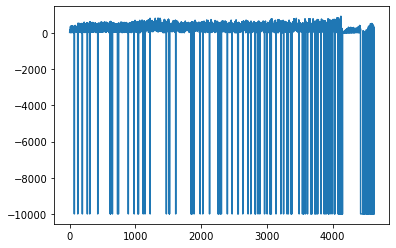

In [6]:
plt.plot(a['SLP_AVE'])

(0.001, 1.0)

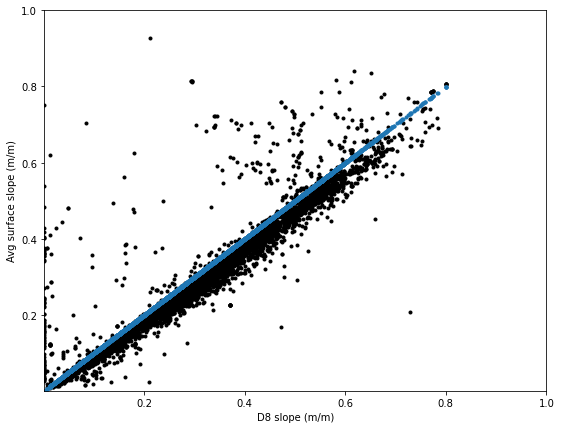

In [49]:
fig,ax = plt.subplots(figsize=(9,7))

plt.plot(slps2[:len(a)],a['SLP_AVE']/1000,'k.')
plt.plot(slps2,slps2,'.')
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('D8 slope (m/m)')
plt.ylabel('Avg surface slope (m/m)')
plt.xlim([10**-3, 10**0])
plt.ylim([10**-3, 10**0])

In [ ]:
fig,ax = plt.subplots(figsize=(9,7))
plt.plot(slpsall[:len(a)],a['ebe_mmkyr']/1000,'k.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('D8 slope (m/m)')
plt.ylabel('Observed erosion rate (mm/kyr)')

In [ ]:
plt.plot(np.log10(ks2),r2s,'.')
ro = np.where(r2s>.01)[0][5]
plt.plot(dfs[ro][:len(a)],a['ebe_mmkyr'], '.')
plt.xscale('log')
plt.yscale('log')

Text(0, 0.5, 'count')

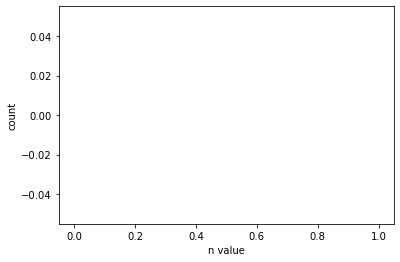

In [185]:
plt.hist(np.log10(diffus[r2s<3.4]))
plt.xlabel('n value')
plt.ylabel('count')

In [27]:
plt.plot(dfs[np.argmax(r2s)],a['ebe_mmkyr'],'.')

NameError: name 'dfs' is not defined

In [10]:
plt.plot((ns),r2s,'.')
ns[np.argmax(r2s)]

NameError: name 'r2s' is not defined

In [ ]:
plt.plot((ns),r2s,'.')
ns[np.argmax(r2s)]

In [470]:
ls = gpd.read_file('/Users/gr_1/Downloads/River_basin_num2/River_basin_num2.shp')
#ls.Volume.sum()*1e2*2700/1e9

In [471]:
ls.to_file('/Users/gr_1/Downloads/river_bsn')

In [472]:
len(np.where(a['ebe_mmkyr'] ==0)[0])

0

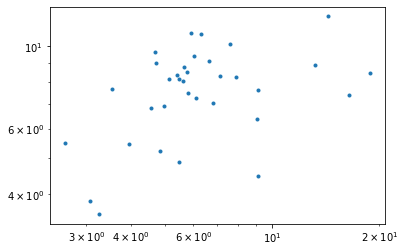

In [15]:
plt.plot(dfs[4][:35],a['ebe_mmkyr'][:35],'.')
plt.xscale('log')
plt.yscale('log')

In [81]:
dfs[1][:37]

IndexError: index 1 is out of bounds for axis 0 with size 1

In [ ]:
#plt.plot(dfs[10,0],a['ebe_mmkyr'],'.')
#plt.xscale('log')
#plt.yscale('log')
#np.save('ers_diffu+sp',eros1)
#a= plt.plot(ks,r2s[:,0],'.')
#plt.xscale('log')
#plt.hist(concavities)
plt.plot(diffus[r2s>.15]),bins=10)


In [50]:
folder = 'results/v2_ds/'
if 1:
    np.save('{}/eros'.format(folder),eros1)
    np.save('{}/diffu'.format(folder),diffus)
    np.save('{}/ms'.format(folder),ms)
    np.save('{}/ns'.format(folder),ns)
    np.save('{}/ks'.format(folder),ks)
    np.save('{}/careas'.format(folder),careas)
    np.save('{}/Gs'.format(folder),Gs)
    np.save('{}/careas'.format(folder),careas)
    np.save('{}/slps2'.format(folder),slps2)
    np.save('{}/dns'.format(folder),dn)
    

/Users/gr_1/opt/miniconda3/envs/ee/lib/python3.9/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [52]:
dn

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
       2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ])

In [164]:
eros1 = np.load('r_sole/eros.npy',allow_pickle=True)

In [18]:
    np.save('{}/slps2'.format(folder),slps2)


In [222]:
#eros2 = np.load('eros_with_diffusion-var_hills.npy',allow_pickle=True)
folder = 'results/r_G_1'
ns = np.load('{}/ns.npy'.format(folder),allow_pickle=True)
ms = np.load('{}/ms.npy'.format(folder),allow_pickle=True)
diffus = np.load('{}/diffu.npy'.format(folder),allow_pickle=True)
eros1 = np.load('{}/eros.npy'.format(folder),allow_pickle=True)

In [192]:
for i in range(1,len(eros1)):
    if eros1[i] is None:
        continue
    else:
        eros1[i] = np.concatenate([eros1[i],eros2[i]])

ValueError: x and y must have same first dimension, but have shapes (19, 41) and (3553,)

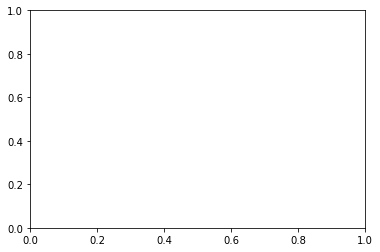

In [17]:
plt.plot(slpsa[:len(a)],a['slp_ave']/1000,'.')
plt.plot(np.arange(1e-2,1.0,1e-2),np.arange(1e-2,1.0,1e-2),'.')
plt.yscale('log')
plt.xscale('log')

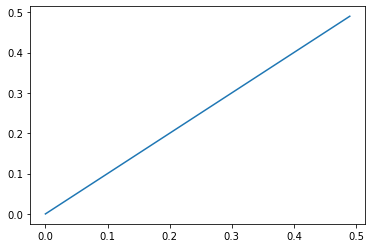

In [135]:
plt.plot(np.arange(0,.5,.01),np.arange(0,.5,.01))

In [8]:
np.a['slps1'] = slps1[:len(a)]

In [9]:
np.from sklearn import linear_model

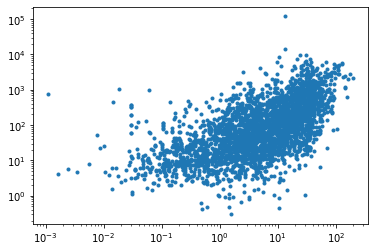

In [63]:
plt.plot(dfs[0][:len(a)], a['ebe_mmkyr'],'.')
plt.xscale('log')
plt.yscale('log')

In [ ]:
eros1[1:]*=1000000

## Begin other thing

In [223]:
#@jit(nopython=True)
#def loop_results(eros1, dfs,n,c):
n = 35#3553
nt = 1000
dfs = np.array([None]*len(eros1[1]))
              
c=0
for i in range(len(eros1[1])):
        dfs[i] = np.zeros(len(eros1))
        for k in range(1,len(eros1)):
            if (eros1[k] is None):
                continue
            else:
                dfs[i][k] = eros1[k][i]
            c+=1
    #return dfs
            

In [154]:
from sklearn import linear_model as lm
import sklearn
r2s = np.zeros(len(eros1[1]))
resid = np.zeros(len(eros1[1]))
pcoef = np.zeros(len(eros1[1]))
ks2 = ks.copy()
diffus2 = diffus.copy()
for i in range(len(eros1[1])):#range(len(ms)):
        if dfs[i] is None:
            continue
        
        y = np.log(np.float64(a['ebe_mmkyr'])/1000)
        x = np.log(dfs[i][:len(a)])
        #I_min = np.where(a['slp_ave'][:n]/1000>1e-1)[0]
        #x=x[I_min]
        #y=y[I_min]
        xi = x.copy()
        I = np.where(np.logical_or(np.isnan(x),np.isinf(x)))[0]
        x=np.delete(x,I)
        y=np.delete(y,I)
        I2 = np.where(np.logical_or(np.isnan(y),np.isnan(x)))[0]
        x = np.delete(x,I2)
        y = np.delete(y,I2)
        l1  = lm.LinearRegression(fit_intercept=False)
        l = lm.LinearRegression()
        if len(x[np.logical_not(np.isnan(x))])>n-500:
                print(len(x[np.logical_not(np.isnan(x))]))
                p1 = l1.fit(np.exp(x.reshape(-1,1)),np.exp(y.reshape(-1,1)))
                p = l.fit(x.reshape(-1,1), y.reshape(-1,1 ))

                y2 = p.predict(x.reshape(-1,1))
                y3 = x * p.coef_
                r2s[i] = sklearn.metrics.r2_score(y.reshape(-1,1),y2)
                diffus2[i] *= p1.coef_
                ks2[i] *= p1.coef_
                resid[i] = np.mean(np.power(y-y3,2))
                print(len(y[np.logical_not(np.isnan(x))]))
                pcoef[i] = p.coef_


NameError: name 'dfs' is not defined

Text(0, 0.5, 'r2')

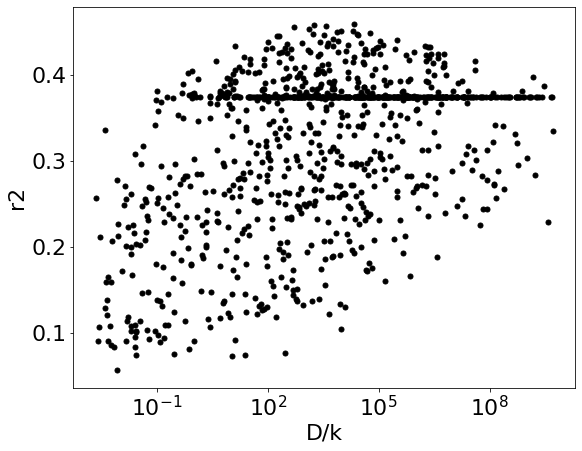

In [277]:
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize = (9,7))
plt.plot((diffus/ks),r2s,'k.', markersize=10)
plt.xscale('log')
plt.xlabel('D/k')
plt.ylabel('r2')


Text(0, 0.5, 'r2')

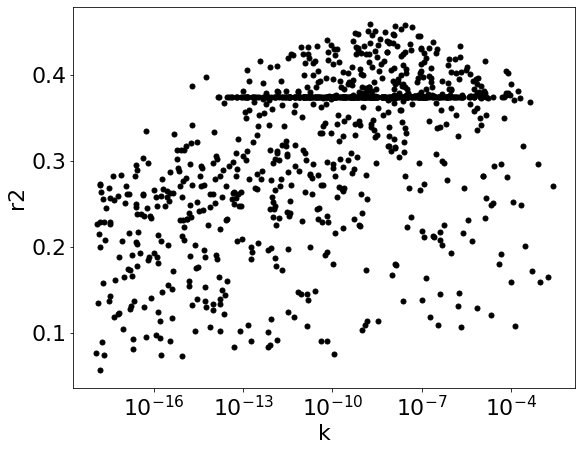

In [285]:
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize = (9,7))
plt.plot((ks2),r2s,'k.', markersize=10)
plt.xscale('log')
plt.xlabel('k')
plt.ylabel('r2')


Text(0, 0.5, 'run count')

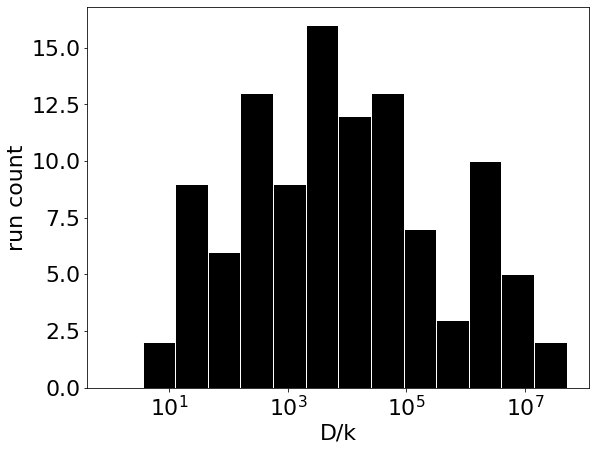

In [289]:
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize = (9,7))
plt.hist(np.divide(diffus[r2s>.4],ks[r2s>.4]),edgecolor='w',color='k',bins = np.power(10.0,np.arange(0,8,.55)))
plt.xscale('log')
plt.xlabel('D/k')
plt.ylabel('run count')

In [259]:
np.power(10,np.arange(-10,-4))

ValueError: Integers to negative integer powers are not allowed.

Text(0, 0.5, 'run count')

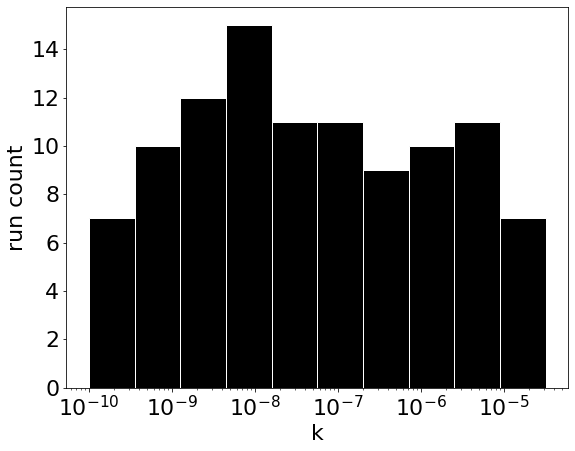

In [270]:
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize = (9,7))
plt.hist((ks[r2s>.4]),edgecolor='w',color='k',bins = np.power(10.0,np.arange(-10,-4,.55)))
plt.xscale('log')
plt.xlabel('k')
plt.ylabel('run count')

Text(0, 0.5, 'r2')

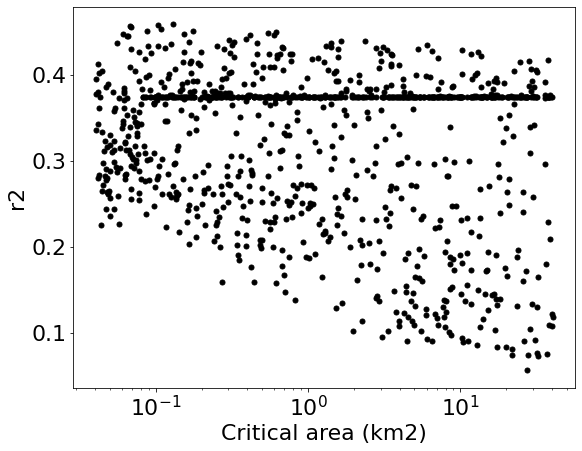

In [293]:
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize = (9,7))
plt.plot((careas)*90**2/1e6,r2s,'k.', markersize=10)
plt.xscale('log')
plt.xlabel('Critical area (km2)')
plt.ylabel('r2')


Text(0, 0.5, 'run count')

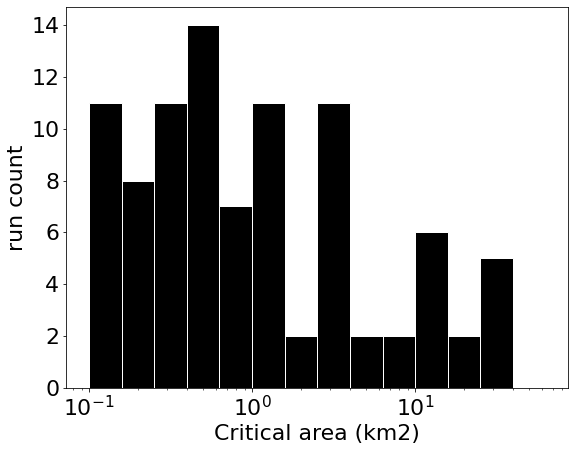

In [304]:
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize = (9,7))
plt.hist(careas[r2s>.4]*90**2/1e6,edgecolor='w',color='k',bins = np.power(10.0,np.arange(-1,2,.2)))
plt.xscale('log')
plt.xlabel('Critical area (km2)')
plt.ylabel('run count')

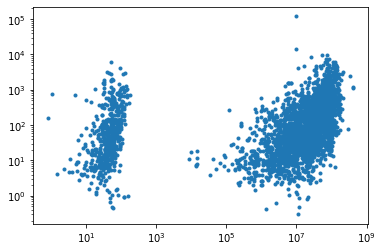

In [122]:
#plt.hist(plt.plot(diffus[r2s>.4]))
#plt.plot(dfs[np.argmax(r2s)][:len(a)],a['ebe_mmkyr'],'.')


In [15]:
ks

array([1.35171591e-05, 2.47521956e-04, 8.90428269e-08, 4.44249167e-06,
       3.04726137e-03, 1.07334156e-04, 1.22966890e-05, 7.73824977e-05,
       2.22489836e-09, 3.70245556e-03, 7.16858240e-07, 5.63449033e-08])

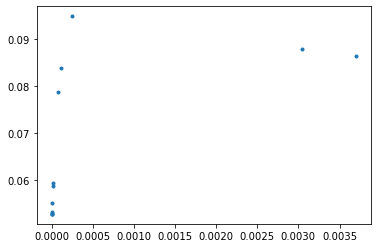

In [14]:
plt.plot(ks,r2s,'.')
#plt.xscale('log')
#plt.yscale('log')

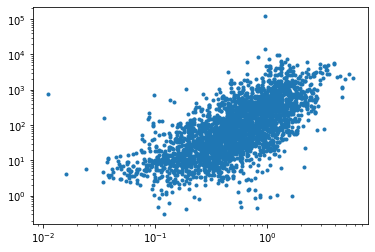

In [33]:
plt.plot(dfs[966][:len(a)],a['ebe_mmkyr'],'.')
plt.xscale('log')
plt.yscale('log')

In [13]:
Gs

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [43]:
np.argmin(np.abs(ns-1.9286))

126

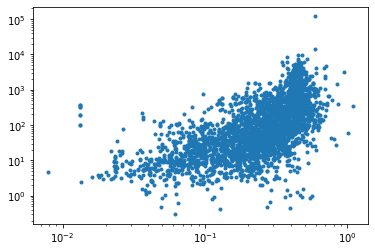

In [54]:
plt.plot(slpsall[:len(a)],a['ebe_mmkyr'],'.')
plt.xscale('log')
plt.yscale('log')
#plt.plot(np.log(dfs[np.argmax(a)]))

In [52]:
diffus[np.argmax(r2s)]

3.804728305633972e-05

In [ ]:
# from sklearn import linear_model as lm
# import sklearn
# r2s = np.zeros((len(ms),len(ns)))
# for i in range(20):#range(len(ms)):
#     for j in range(16):#range(len(ns)):
#         if dfs[i,j] is None:
#             continue
    
#         y = np.log(np.float64(a['ebe_mmkyr'])/1000)
#         x = np.log(dfs[i,j])
#         I_min = np.where(a['slp_ave'][:n]/1000>1e-1)[0]
#         x=x[I_min]
#         y=y[I_min]
#         xi = x.copy()
#         I = np.where(np.logical_or(np.isnan(x),np.isinf(x)))[0]
#         x=np.delete(x,I)
#         y=np.delete(y,I)
#         I2 = np.where(np.logical_or(np.isnan(y),np.isnan(x)))[0]
#         x = np.delete(x,I2)
#         y = np.delete(y,I2)
#         l  = lm.LinearRegression()
#         if (len(x)==0) or (len(y)==0):
#             continue
#         p = l.fit(x.reshape(-1,1),y.reshape(-1,1))
#         y2 = p.predict(x.reshape(-1,1))
#         r2s[i,j]=sklearn.metrics.r2_score(y.reshape(-1,1),y2)


(array([228.,  16.,  13.,  16.,  14.,   7.,   3.,   3.,   4.,   4.]),
 array([1.13918299e-07, 9.13308192e-02, 1.82661524e-01, 2.73992230e-01,
        3.65322935e-01, 4.56653640e-01, 5.47984346e-01, 6.39315051e-01,
        7.30645756e-01, 8.21976461e-01, 9.13307167e-01]),
 <BarContainer object of 10 artists>)

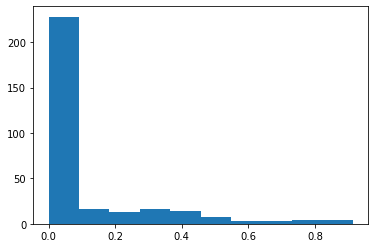

In [84]:
plt.hist(diffus[np.logical_and(r2s<.38,r2s>.36)])

In [15]:
a['ksn'] = a['ebe_mmkyr'].to_numpy()/dfs[4,5][:len(a)]
a.to_file('octo_327_data/')
plt.plot(a['ksn'],a['ebe_mmkyr'],'.')
plt.yscale('log')
plt.xscale('log')

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [73]:
plt.plot(dfs[4,10],a['ebe_mmkyr'],'.')
plt.yscale('log')
plt.xscale('log')
plt.xlim([10e-11,10e-5])

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

0.31561967388953904

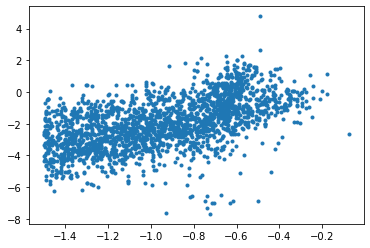

In [13]:
y = np.log(np.float64(a['ebe_mmkyr'])/1000)
x = np.log(np.float64(a['slp_ave'][:n]/1000))
I0 = np.where(x<-1.5)[0]
xi = x.copy()
x = np.delete(x,I0)
y = np.delete(y,I0)
I = np.where(np.logical_or(np.isnan(x),np.isinf(x)))[0]
x=np.delete(x,I)
y=np.delete(y,I)
I2 = np.where(np.logical_or(np.isnan(y),np.isnan(x)))[0]
x = np.delete(x,I2)
y = np.delete(y,I2)
l  = lm.LinearRegression()
p = l.fit(x.reshape(-1,1),y.reshape(-1,1))
y2 = p.predict(x.reshape(-1,1))
plt.plot(x,y,'.')
sklearn.metrics.r2_score(y.reshape(-1,1),y2)


ValueError: x and y must have same first dimension, but have shapes (19, 41) and (3553,)

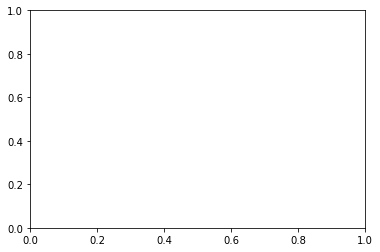

In [72]:
plt.plot(slps1,a['ebe_mmkyr'],'.')
plt.xscale('log')
plt.yscale('log')

In [ ]:
y = np.log(np.float64(a['ebe_mmkyr'])/1000)
x = np.log(np.float64(a['slps1']))
xi = x.copy()
I = np.where(np.logical_or(np.isnan(x),np.isinf(x)))[0]
x=np.delete(x,I)
y=np.delete(y,I)
I2 = np.where(np.logical_or(np.isnan(y),np.isnan(x)))[0]
x = np.delete(x,I2)
y = np.delete(y,I2)
l  = lm.LinearRegression()
p = l.fit(x.reshape(-1,1),y.reshape(-1,1))
y2 = p.predict(x.reshape(-1,1))
sklearn.metrics.r2_score(y.reshape(-1,1),y2)

In [15]:
#ax=plt.plot(eros1[:len(a)],a['ebe_gcmyr']/1000,'.')
slps_ = slps1
slps_[slps_<1e-6] = np.nan
ax=plt.plot(eros1[len(a)],a['ebe_gcmyr'][/1000,'.')
plt.yscale('log')
plt.xscale('log')
#plt.xlim([1e-2, 1])
#plt.ylim([1e-2, 1])

#a['ebe_gcmyr'][a['erorate_est']<=0] = np.nan

SyntaxError: invalid syntax (<ipython-input-15-e6381bda8298>, line 4)

In [20]:
r2s

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [ ]:
from sklearn import linear_model as lm
ax=plt.plot(slps1[1:3500],np.float64(a['ebe_mmkyr'][1:3500])/1000,'.')
erate = np.float64(a['ebe_mmkyr'][1:n])/1000
slps1 = slps1[1:n]
I = np.where(slps1 ==0)
np.delete(slps1,I)
slps1 = erate = np.delete(erate,I)
I2 = np.where(np.isnan(erate))
slps1 = np.delete(slps1,I2)
erate = np.delete(erate,I2)
l  = lm.LinearRegression()
l.fit(slps1.reshape(-1,1),erate.reshape(-1,1))
plt.yscale('log')
plt.xscale('log')

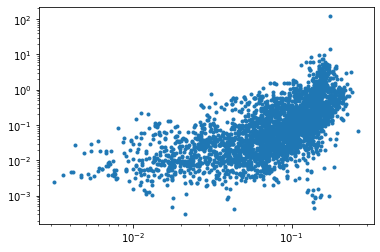

In [47]:
ax=plt.plot(np.float64(a['slp_ave'][1:3500]/3500),np.float64(a['ebe_mmkyr'][1:3500])/1000,'.')
plt.yscale('log')
plt.xscale('log')

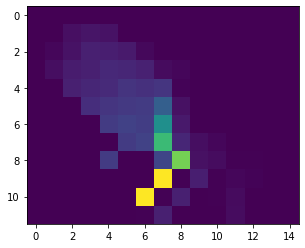

In [109]:
plt.imshow(f.A)

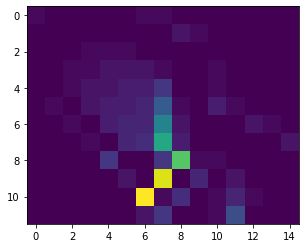

In [114]:
plt.imshow(A)

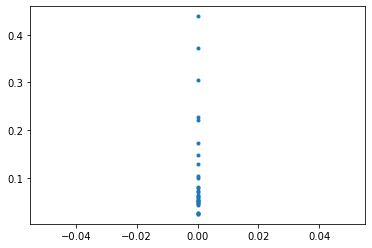

In [40]:
#ax=plt.plot(eros1[:len(a)],a['ebe_gcmyr']/1000,'.')
#ax=plt.plot(slps1[:len(a)],a['slp_ave'],'.')
ax=plt.plot(eros1[:30],np.float64(a['slp_ave'][:30])/1000,'.')

#plt.yscale('log')
#plt.xscale('log')
#plt.xlim([5e-4, 1])

In [119]:
np.argmax(np.abs(slps1[1:30] - np.float64(a['slp_ave'][1:30])))

28

NameError: name 'dfs' is not defined

In [ ]:
import seaborn as sns

In [ ]:
a.columns

Rearrange Section 3 so that it starts with the measurements and then describes how we analyzed them.  Expand it paragraph by paragraph as follows.

3.0.  Measurements of Q and C.  The second paragraph of what is now Section 3.1 is a good start.  Expand the text so that it includes more information about how the measurements were made and where the data are stored so that readers could find the data if they want to.  Paragraphs:
- TWRA measurement history and protocols
- Characteristics of Q and C data (gaps, frequency, etc.)
- We analyzed data from X rivers.  Explain why we chose those rivers.

3.1.  Rating curve background.  Paragraphs:
- What is a rating curve?  Show Equation 1.
- RCs are useful for improving estimates of Q_s
- We used MVUE to estimate a and b.  Explain why we chose this method.
- We centered log(Q) to avoid correlation of a and b
- We applied a correction for log retransformation bias.

3.2.  Rating curve application.  Paragraphs:
- We used the method in Section 3.1 to get daily C and Q_s.  Different rating curves each year.
- We calculated annual Q_s from daily Q_s.  Describe how we dealt with gaps.
- We calculated erosion rates from Q_s.
- How we dealt with nested basins.

3.3.  Landslide volumes generated by Morakot.  Paragraphs:
- We use landslide volumes reported in Marc et al. (2018)
- We calculated basin-total landslide volumes from that inventory.